## Apple stork prices - forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AAPL.csv')

In [3]:
data.head(10)

Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   
5           5   AAPL  2015-06-03 00:00:00+00:00  130.120  130.940  129.90   
6           6   AAPL  2015-06-04 00:00:00+00:00  129.360  130.580  128.91   
7           7   AAPL  2015-06-05 00:00:00+00:00  128.650  129.690  128.36   
8           8   AAPL  2015-06-08 00:00:00+00:00  127.800  129.210  126.83   
9           9   AAPL  2015-06-09 00:00:00+00:00  127.420  128.080  125.62   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   
5  130.66  30983542  119.908625  120.664274  119.705890  120.406248   
6  129.58  38450118  119.208267  120.332526  118.793582  119.411002   
7  129.50  35626800  118.553986  119.512370  118.286744  119.337280   
8  128.90  52674786  117.770691  119.070039  116.876813  118.784366   
9  126.70  56075420  117.420512  118.028717  115.761770  116.757015   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  
2   50884452      0.0          1.0  
3   32112797      0.0          1.0  
4   33667627      0.0          1.0  
5   30983542      0.0          1.0  
6   38450118      0.0          1.0  
7   35626800      0.0          1.0  
8   52674786      0.0          1.0  
9   56075420      0.0          1.0

In [4]:
data.shape

(1258, 15)

In [5]:
data.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

### Data preprocessing

In [6]:
data.set_index("date", inplace=True)
data.index = pd.to_datetime(data.index)

In [7]:
data = data.drop(['symbol','Unnamed: 0','splitFactor', 'divCash'],axis=1)

In [8]:
data.isnull().sum()

close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
dtype: int64

In [9]:
data.duplicated().sum()

0

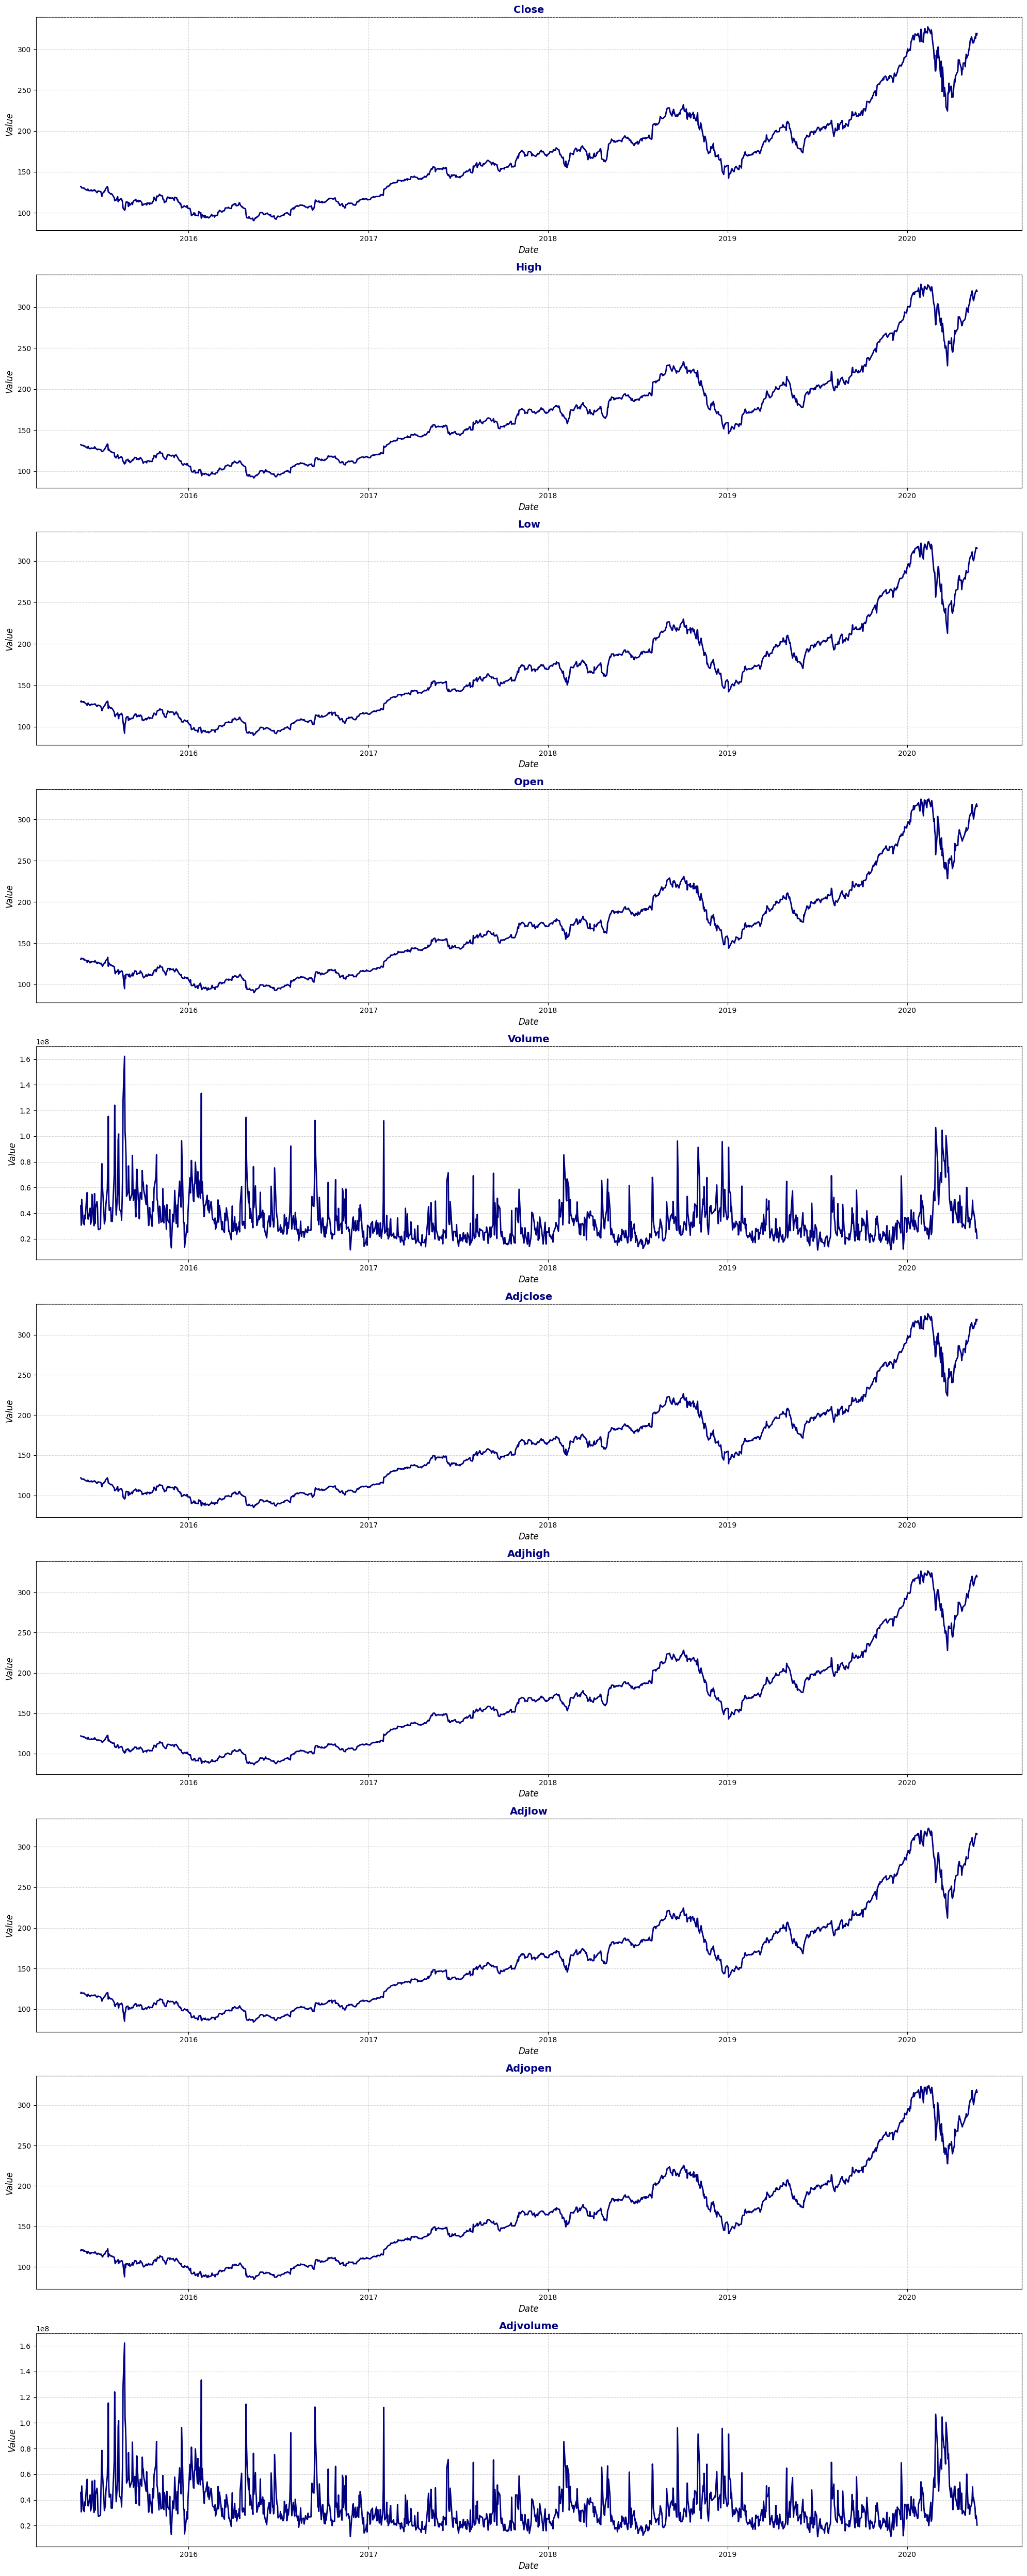

In [10]:
import matplotlib.pyplot as plt

def plot_columns(data, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(20, 5*num_columns))
    
    color = 'navy'  # Odabir jedne boje za sve linije
    
    for i, column in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes
        ax.plot(data[column], color=color, linewidth=2)
        ax.set_title(column.capitalize(), fontsize=14, fontweight='bold', color=color)
        ax.set_xlabel('Date', fontsize=12, fontstyle='italic', color='black')
        ax.set_ylabel('Value', fontsize=12, fontstyle='italic', color='black')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        ax.tick_params(axis='both', which='minor', labelsize=8, colors='black')
        ax.spines['top'].set_linestyle('--')
        ax.spines['right'].set_linestyle('--')
    
    plt.tight_layout()
    plt.show()

# Primer korišćenja:
columns = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
plot_columns(data, columns)


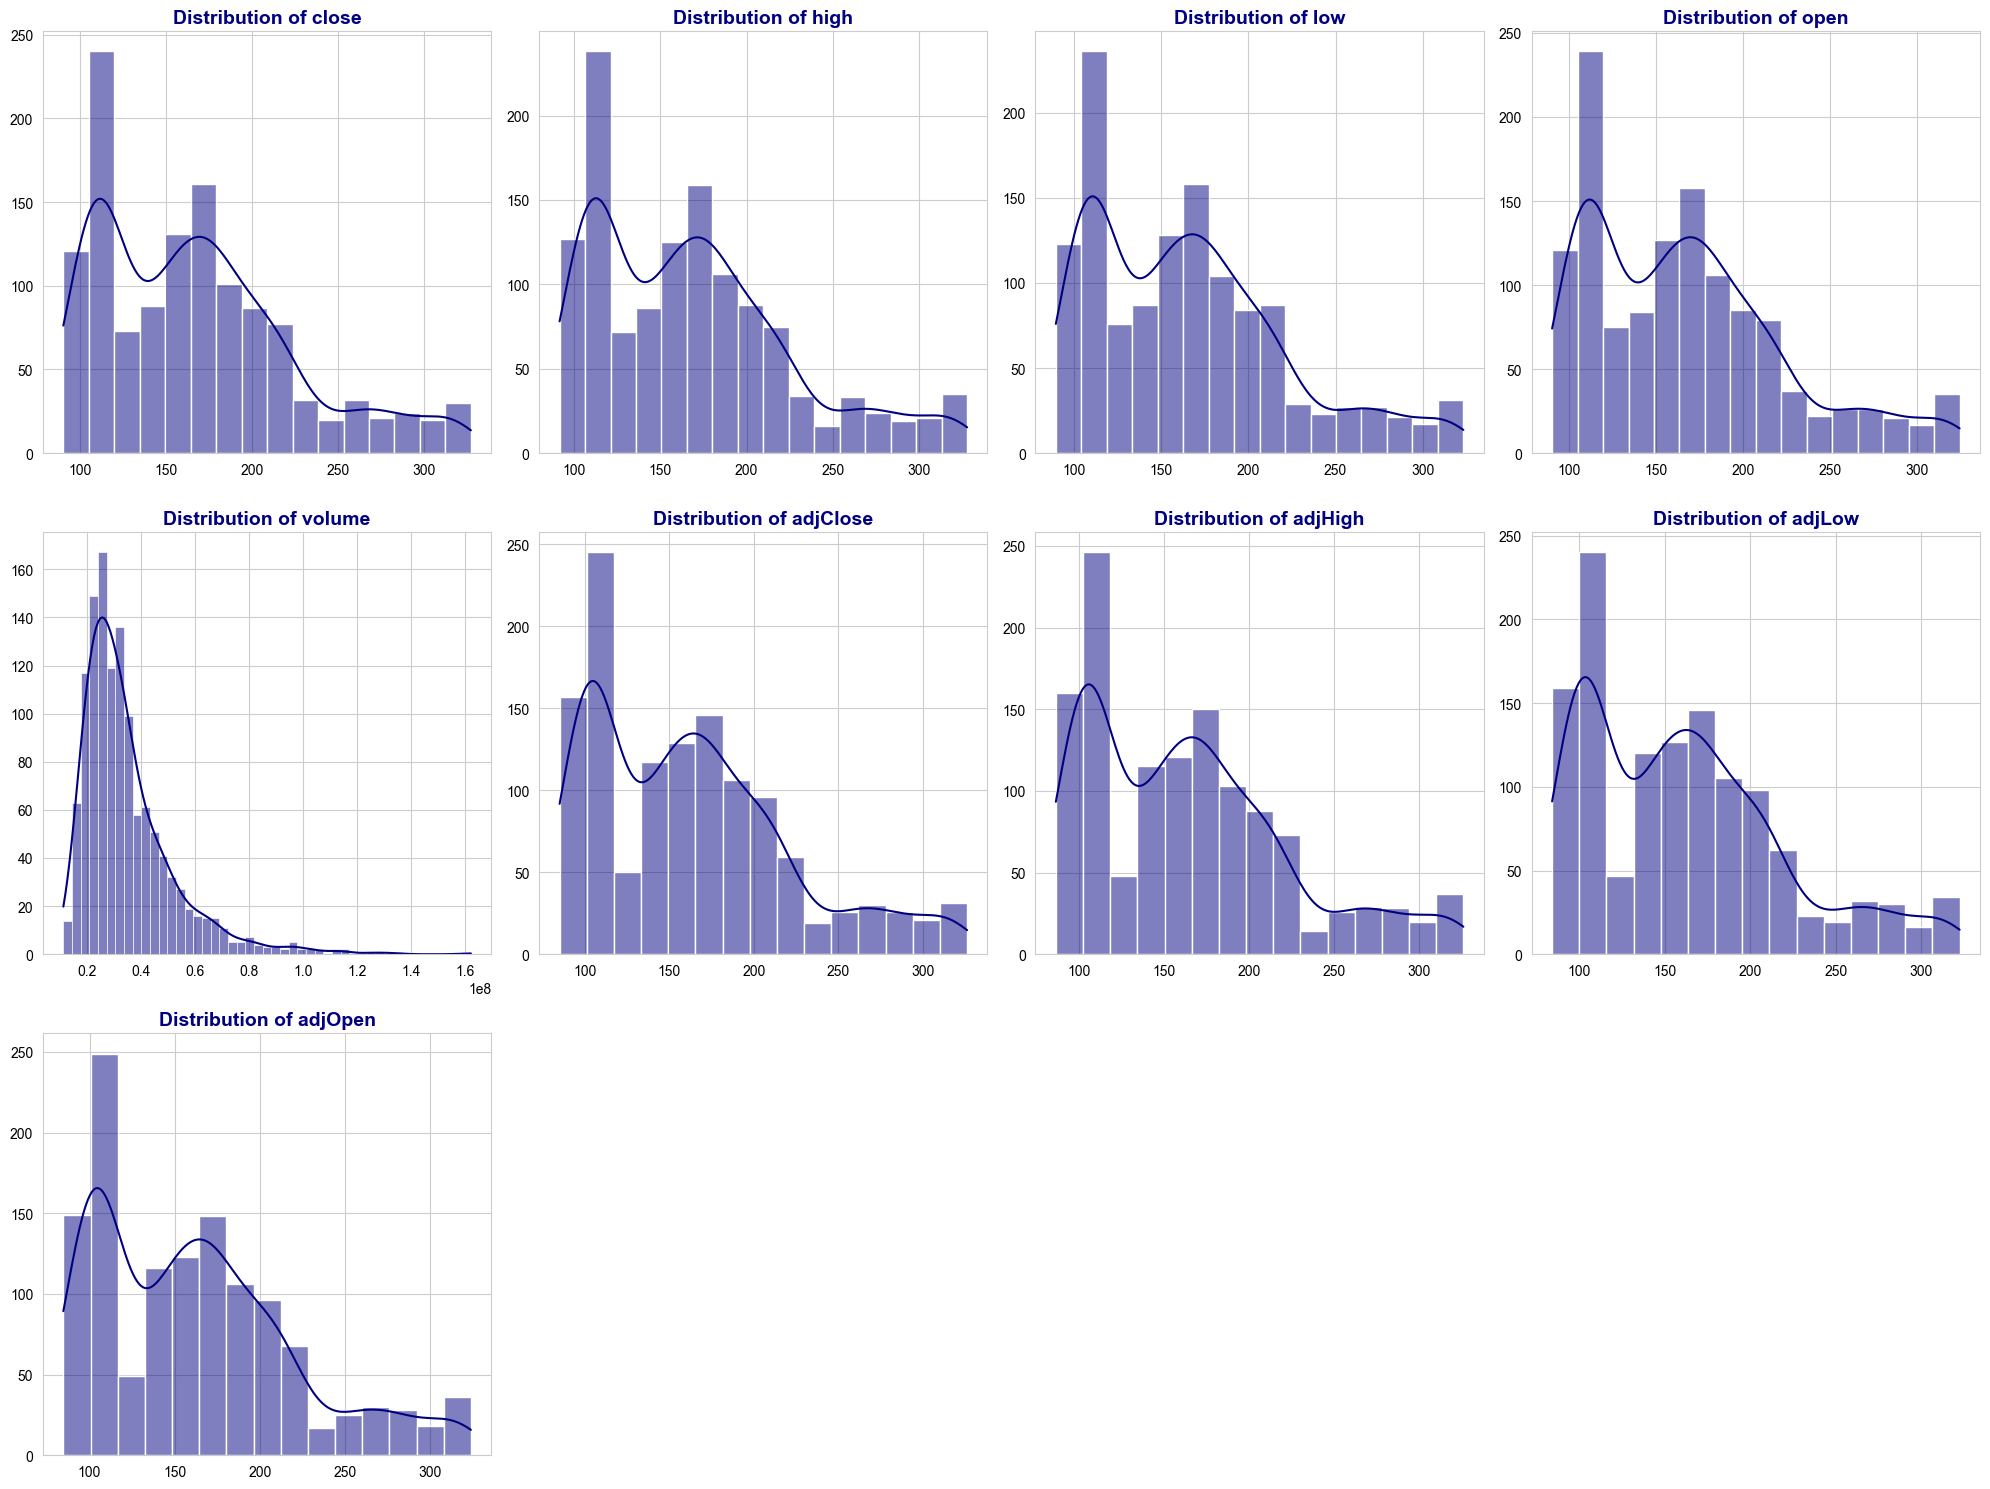

In [11]:

sns.set_style("whitegrid")

num_cols = 4 
num_rows = (len(data.columns) - 2) // num_cols + 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(data.columns[:]):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[column], kde=True, ax=axes[row, col], color='navy')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold', color='navy')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')
    axes[row, col].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[row, col].tick_params(axis='both', which='minor', labelsize=8, colors='black')

for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


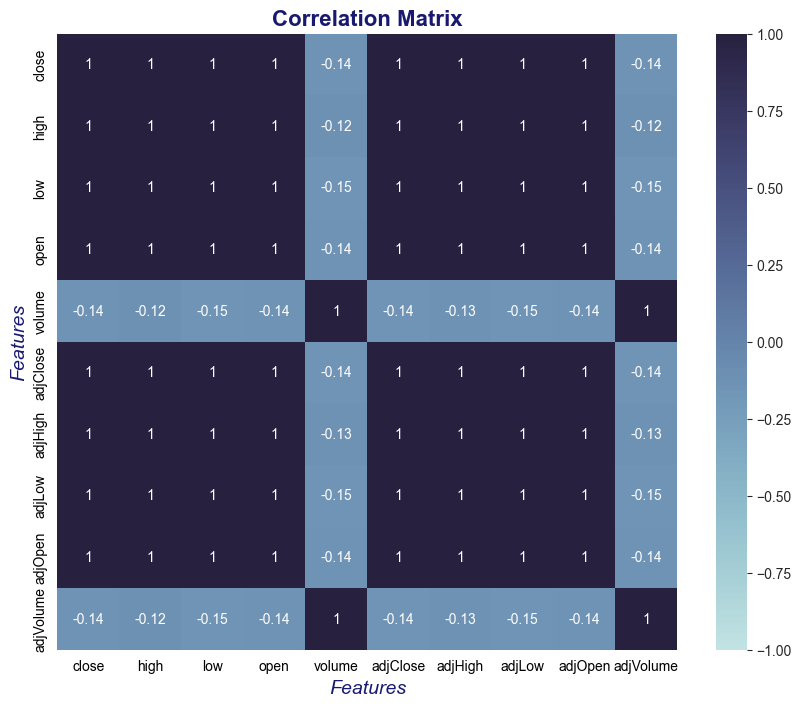

In [12]:
corr_matrix = data.corr()

# Prebaci ovo gore kod definicije funkcija, ovde samo pozovi
def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold', color='midnightblue')
    plt.xlabel('Features', fontsize=14, fontstyle='italic', color='midnightblue')
    plt.ylabel('Features', fontsize=14, fontstyle='italic', color='midnightblue')
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()

plot_correlation_heatmap(corr_matrix)


In [13]:
data.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume'],
      dtype='object')

In [14]:
data_close = data['close']

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [16]:
train_size = int(len(data_scaled) * 0.75)

train_data, test_data = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

print("Dimenzije train_data:", train_data.shape)
print("Dimenzije test_data:", test_data.shape)


Dimenzije train_data: (943, 1)
Dimenzije test_data: (315, 1)


In [17]:
import numpy as np 
def create_sequences(data, sequence_length):
    X, y = [], []

    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])

    return np.array(X), np.array(y)

In [18]:
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(933, 10, 1)
(305, 10, 1)
(933, 1)
(305, 1)


In [21]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [22]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=25, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True)

In [23]:
def plot_train_history(history):
    plt.figure(figsize=(15, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Epochs', fontsize=14, fontstyle='italic', color='black')
    plt.ylabel('Loss', fontsize=14, fontstyle='italic', color='black')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()


In [24]:
import sklearn.metrics as metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

all_results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2', 'MSE', 'MAPE', 'MSLE'])

def test_model(model, model_name, X_test, y_test, end=-1):    
    X_test = X_test[:end]
    y_test = y_test[:end]
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # msle = mean_squared_log_error(y_test, y_pred)
    msle = 0
    all_results.loc[len(all_results)] = [model_name, rmse, mae, r2, mse, mape, msle]

    plt.figure(figsize=(15, 6))
    plt.plot(y_test, label='True', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title(f'{model_name} Predictions', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Time', fontsize=14, fontstyle='italic', color='black')
    plt.ylabel('Value', fontsize=14, fontstyle='italic', color='black')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()

    display(all_results[-1:])

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




## Isprobavanje modela

### Simple RNN

In [25]:
from keras.layers import SimpleRNN
from tensorflow import optimizers
adam = optimizers.Adam()

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(20, activation='relu'))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=adam, loss = "mean_squared_error")

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
history = model_srnn.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0610 - val_loss: 0.0623
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - val_loss: 0.0111
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 9.6121e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2677e-04 - val_loss: 4.0818e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6808e-05 - val_loss: 4.1402e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0327e-05 - val_loss: 4.1991e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1517e-05 - val_loss: 4.2578e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7881e-05 - val_loss: 4.1796e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4954e-05 - val_loss: 4.1480e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1517e-05 - val_loss: 4.1816e-04


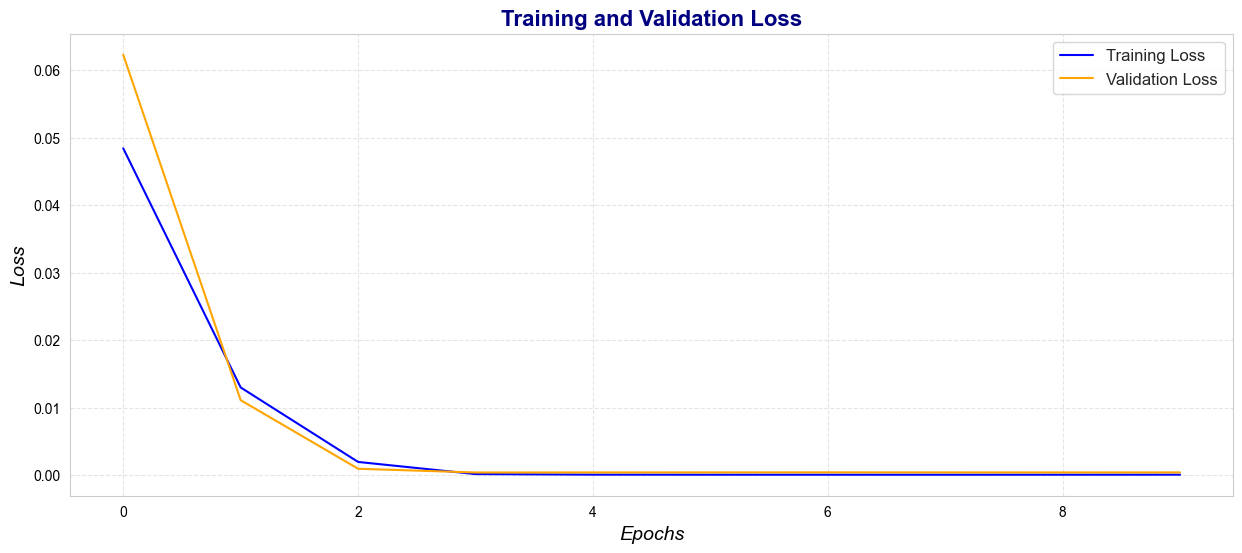

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


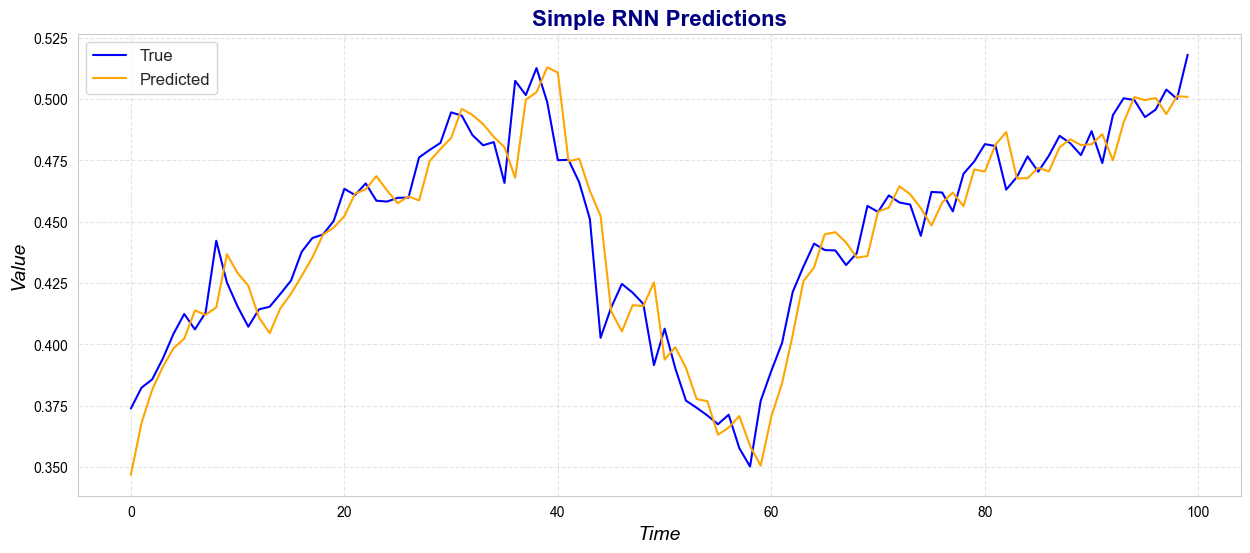

Model      RMSE       MAE        R2      MSE       MAPE  MSLE
0  Simple RNN  0.013022  0.009576  0.896533  0.00017  10.681614     0

In [27]:
from keras.models import load_model
plot_train_history(history)
# best_model = load_model('best_model.keras')
test_model(model_srnn, 'Simple RNN',
           X_test, y_test, 100)

In [28]:
model_rnn_2 = Sequential()
model_rnn_2.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2.add(Dropout(0.2))
model_rnn_2.add(SimpleRNN(100, activation="relu"))
model_rnn_2.add(Dropout(0.2))
model_rnn_2.add(Dense(1))


model_rnn_2.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.01))
model_rnn_2.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Ovo je dobro, sa 100 epohe (probano)
history_rnn_2 = model_rnn_2.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0284 - val_loss: 0.0012
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 4.6075e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 4.1413e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 9.6029e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 5.0012e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 6.1493e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1079e-04 - val_loss: 7.4523e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 4.4940e-04


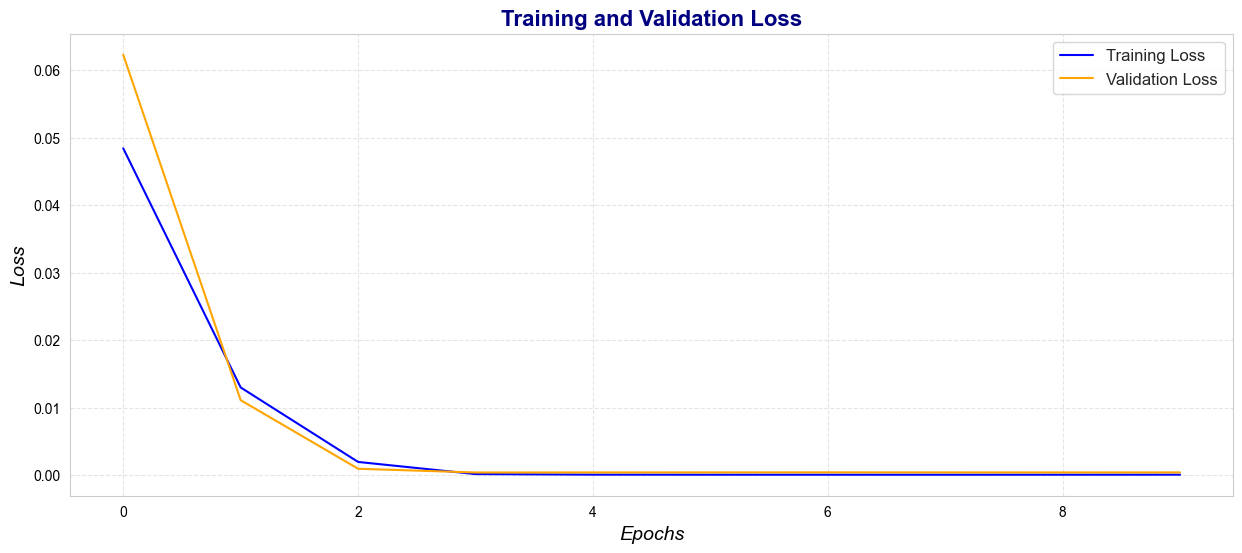

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


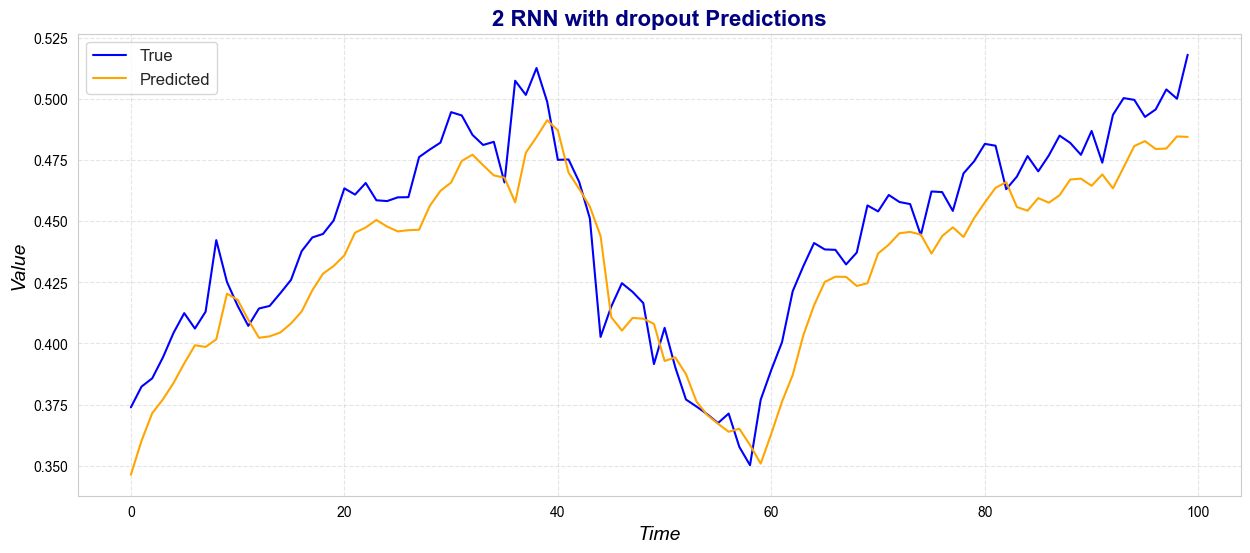

Model      RMSE       MAE        R2       MSE       MAPE  MSLE
1  2 RNN with dropout  0.019103  0.016403  0.777336  0.000365  10.354017     0

In [30]:
plot_train_history(history)
# best_model = load_model('best_model.keras')
test_model(model_rnn_2, '2 RNN with dropout',
           X_test, y_test, 100)

In [31]:
model_complex = Sequential()
model_complex.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_complex.add(Dropout(0.2))
model_complex.add(SimpleRNN(100, activation="relu", return_sequences=True))
model_complex.add(Dropout(0.2))
model_complex.add(SimpleRNN(100, activation="relu"))
model_complex.add(Dense(1))


model_complex.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.001))
model_complex.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 10, 100)        │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,501 (197.27 KB)

 Trainable params: 50,501 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Ovo je dobro, sa 100 epohe (probano)
history_complex = model_complex.fit(X_train, y_train,
                    epochs=30, batch_size=16,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0131 - val_loss: 0.0020
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.6995e-04 - val_loss: 6.9189e-04
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6272e-04 - val_loss: 5.7387e-04
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1628e-04 - val_loss: 0.0013
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3529e-04 - val_loss: 5.5013e-04
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3629e-04 - val_loss: 4.8320e-04
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1361e-04 - val_loss: 9.9784e-04
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6754e-04 - val_loss: 7.3383e-04
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5364e-04 - val_loss: 0.0014
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5891e-04 - val_loss: 4.8770e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7042e-04 - val_loss: 6.9002e-04
E

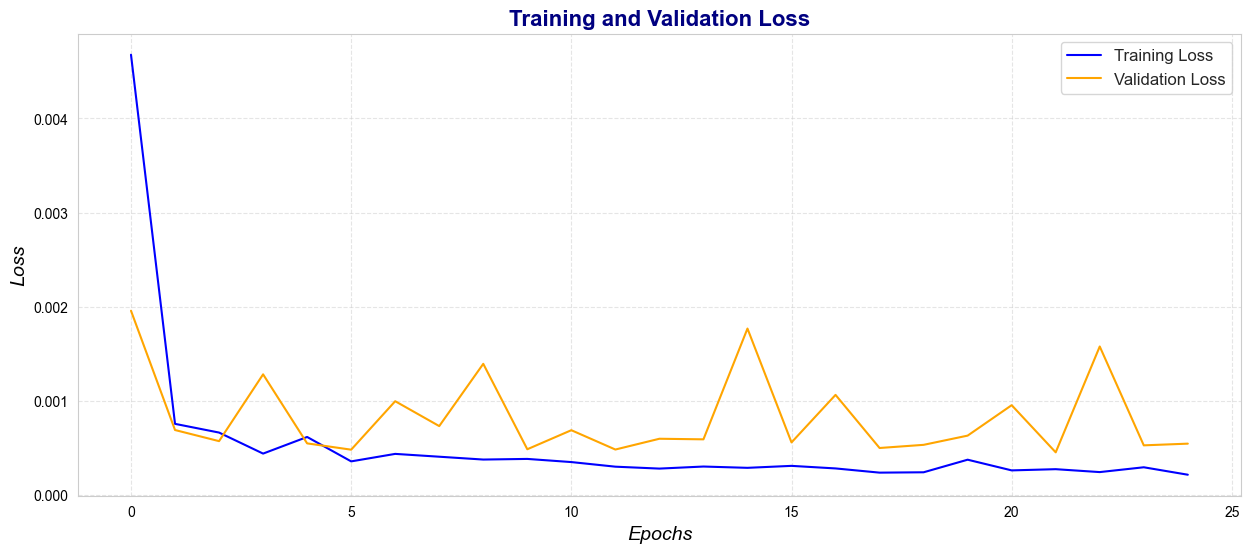

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F53A0BD260> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


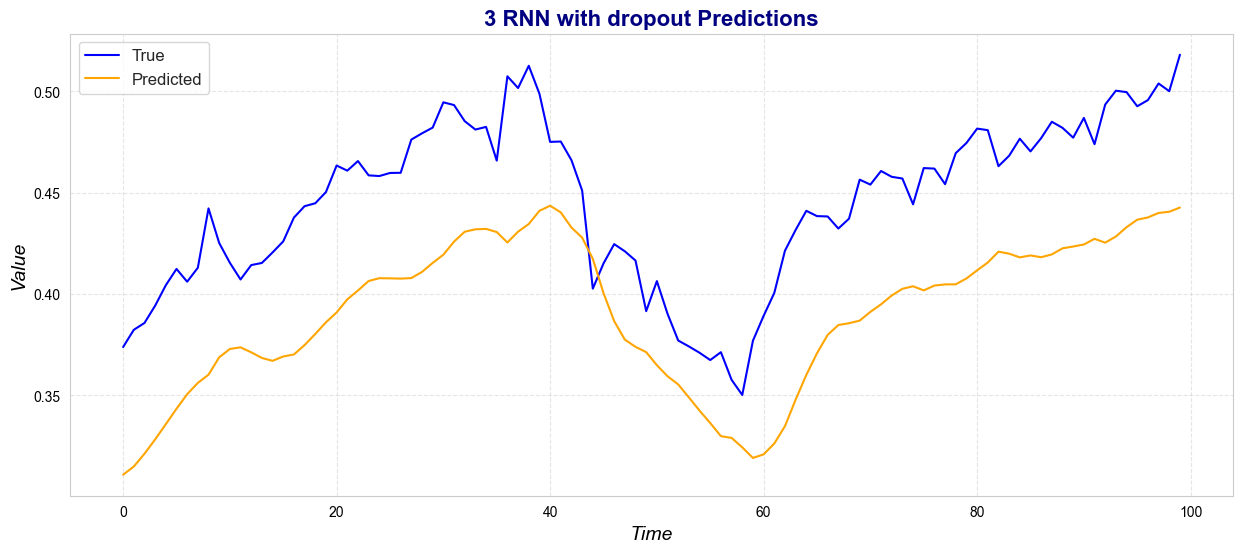

Model      RMSE       MAE        R2       MSE       MAPE  MSLE
2  3 RNN with dropout  0.057471  0.055181 -1.015223  0.003303  14.023619     0

In [33]:
plot_train_history(history_complex)
# best_model = load_model('best_model.keras')
test_model(model_complex, '3 RNN with dropout',
           X_test, y_test, 100)

### LSTM modeli

In [34]:
model_lstm_1 = Sequential()
model_lstm_1.add(LSTM(50, input_shape = (X_train.shape[1],1)))
model_lstm_1.add(Dense(1))
model_lstm_1.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.01))
model_lstm_1.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_lstm = model_lstm_1.fit(X_train, y_train,
                    epochs=15, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0132 - val_loss: 9.0206e-04
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3241e-04 - val_loss: 9.3821e-04
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0271e-04 - val_loss: 8.6181e-04
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7614e-04 - val_loss: 0.0012
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9473e-04 - val_loss: 9.3417e-04
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1787e-04 - val_loss: 5.7925e-04
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2699e-04 - val_loss: 5.8863e-04
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7631e-04 - val_loss: 0.0011
Epoch 9/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6523e-04 - val_loss: 0.0011
Epoch 10/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6983e-04 - val_loss: 5.9214e-04
Epoch 11/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8828e-04 - val_loss: 8.1587e-04
E

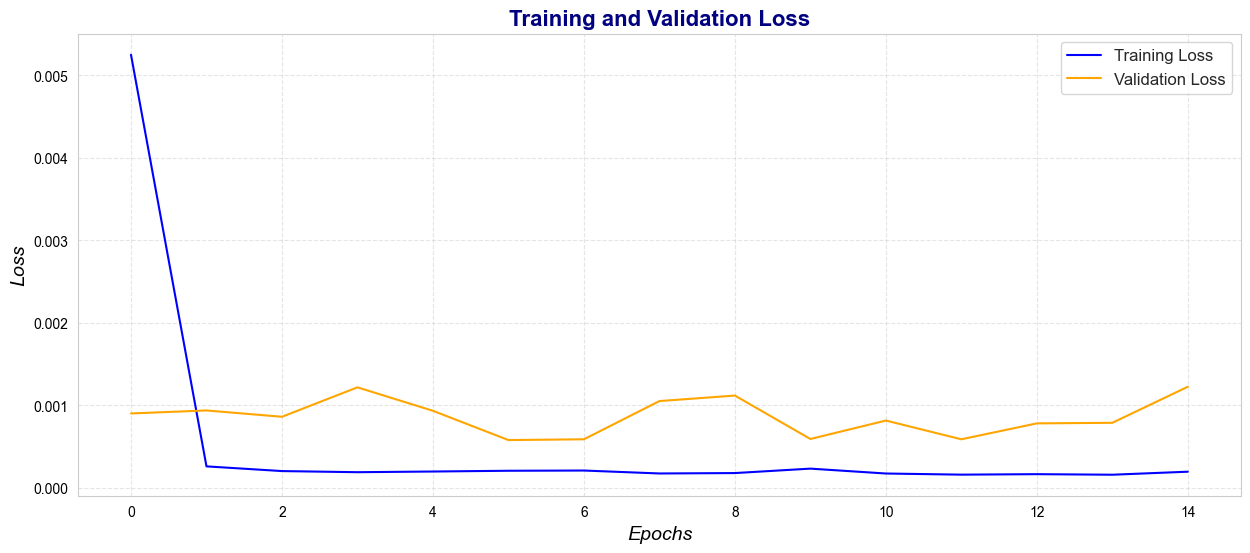

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


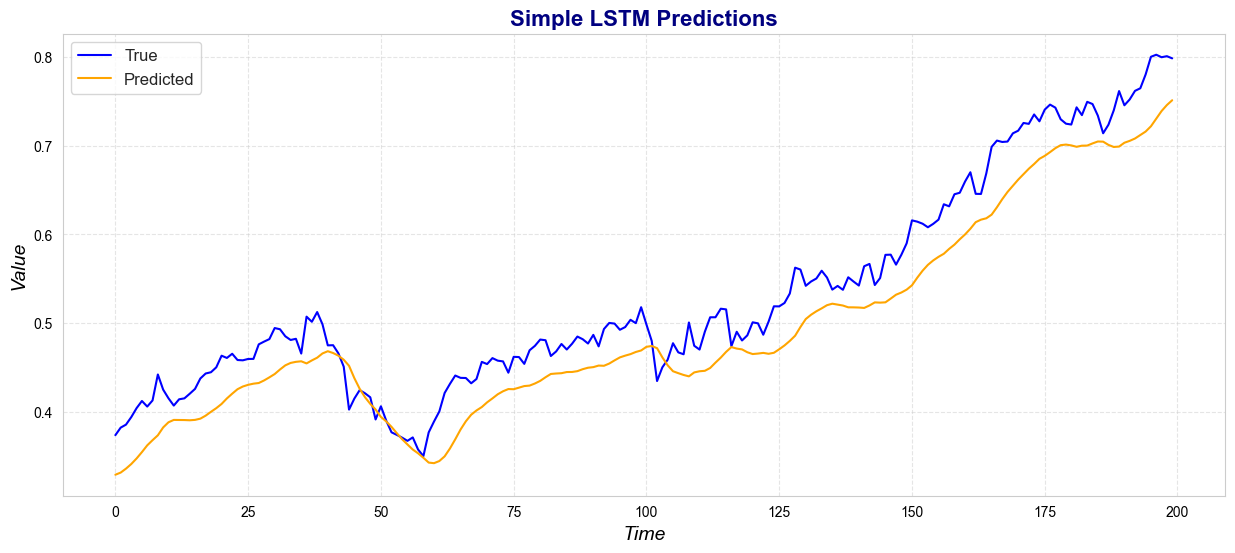

Model      RMSE       MAE        R2       MSE       MAPE  MSLE
3  Simple LSTM  0.042239  0.038315  0.870033  0.001784  23.264943     0

In [36]:
plot_train_history(history_lstm)
best_model = load_model('best_model.keras')
test_model(model_lstm_1, 'Simple LSTM',
           X_test, y_test, 200)

In [37]:
model_multiple_lstm = Sequential()
model_multiple_lstm.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model_multiple_lstm.add(Dropout(0.2))
model_multiple_lstm.add(LSTM(50))
model_multiple_lstm.add(Dense(1))
model_multiple_lstm.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.01))
model_multiple_lstm.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history_multiple_lstm = model_multiple_lstm.fit(X_train, y_train,
                    epochs=40, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0088 - val_loss: 7.5139e-04
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5940e-04 - val_loss: 0.0030
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2695e-04 - val_loss: 7.6553e-04
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.2801e-04 - val_loss: 0.0012
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5567e-04 - val_loss: 8.9431e-04
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1105e-04 - val_loss: 0.0021
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4276e-04 - val_loss: 9.3968e-04
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5222e-04 - val_loss: 0.0011
Epoch 9/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9411e-04 - val_loss: 6.7340e-04
Epoch 10/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3725e-04 - val_loss: 7.3596e-04
Epoch 11/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6074e-04 - val_loss: 6.1265

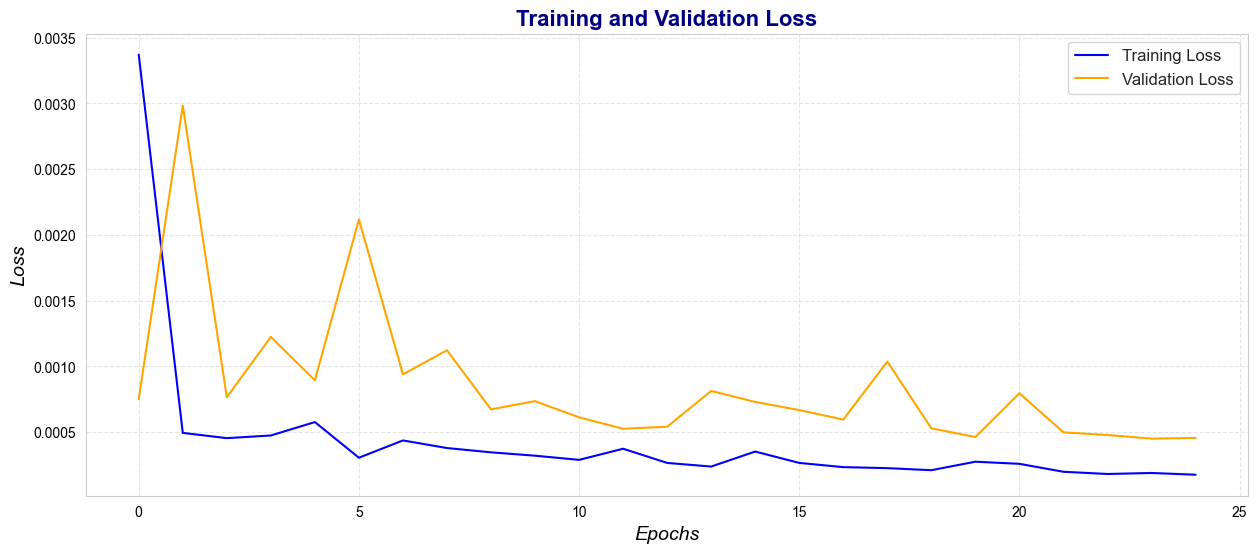

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


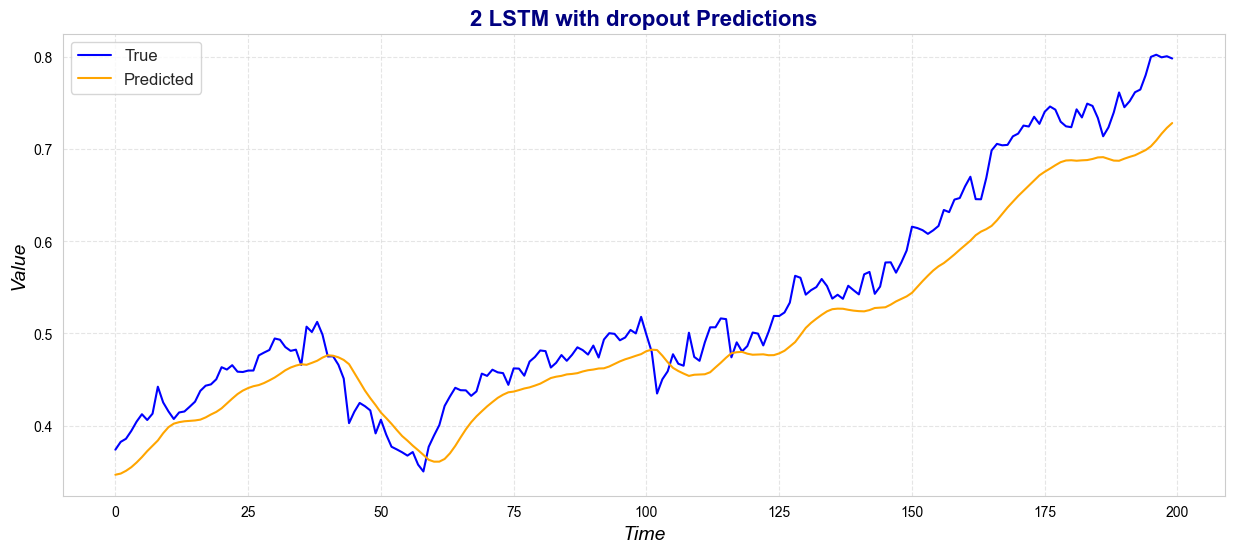

Model      RMSE       MAE        R2       MSE       MAPE  \
4  2 LSTM with dropout  0.041542  0.036164  0.874285  0.001726  22.090024   

   MSLE  
4     0

In [39]:
plot_train_history(history_multiple_lstm)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm, '2 LSTM with dropout',
           X_test, y_test, 200)

In [40]:
model_multiple_lstm_dropout = Sequential()
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True, input_shape=(10, 1)))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(Dense(1))
model_multiple_lstm_dropout.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.01))
model_multiple_lstm_dropout.summary()


c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history_multiple_lstm_dropout = model_multiple_lstm_dropout.fit(X_train, y_train,
                    epochs=50, batch_size=16,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0203 - val_loss: 0.0012
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2096e-04 - val_loss: 0.0012
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 8.6908e-04
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.2664e-04 - val_loss: 0.0011
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.7895e-04 - val_loss: 8.9551e-04
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.9868e-04 - val_loss: 7.6067e-04
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━

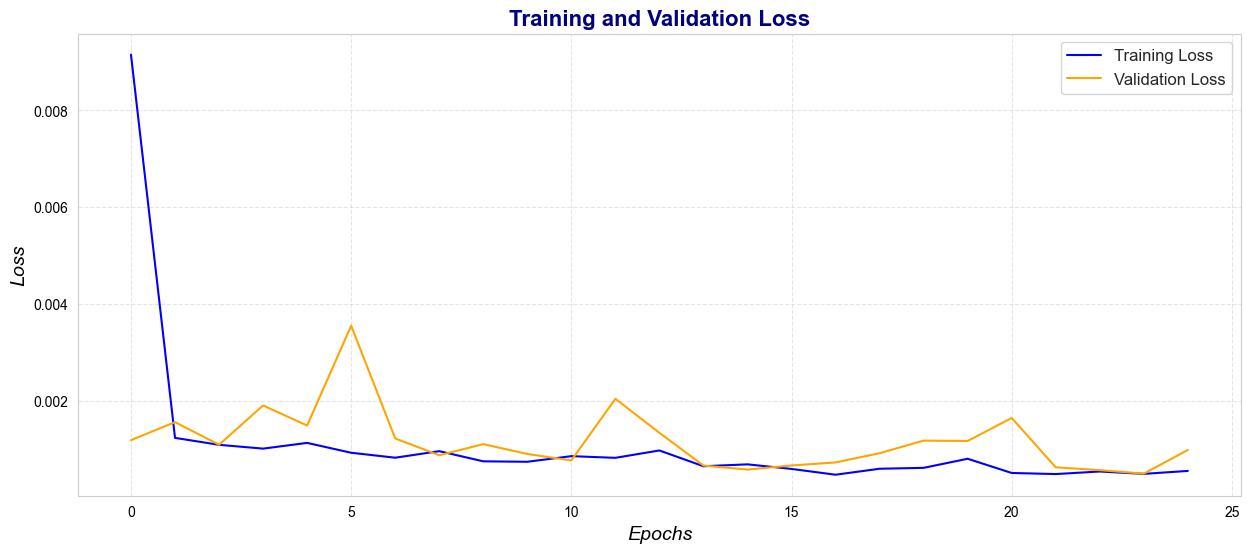

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


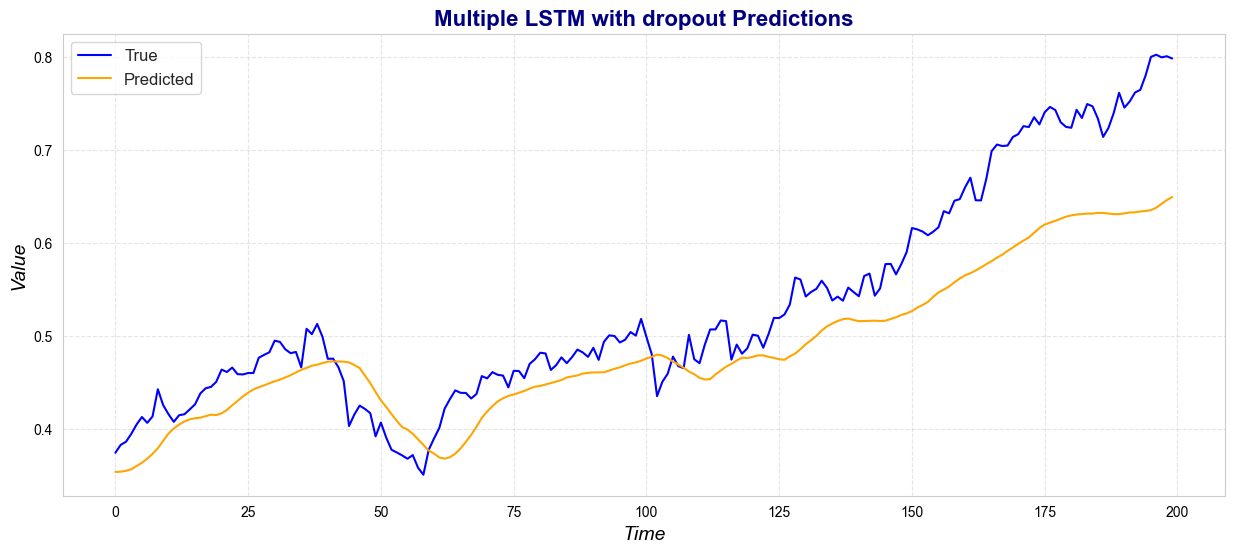

Model     RMSE       MAE        R2       MSE  \
5  Multiple LSTM with dropout  0.06427  0.051498  0.699097  0.004131   

       MAPE  MSLE  
5  20.18174     0

In [42]:
plot_train_history(history_multiple_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm_dropout, 'Multiple LSTM with dropout',
           X_test, y_test, 200)

In [43]:
from keras.layers import GRU

model_lstm_gru = Sequential()
model_lstm_gru.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_lstm_gru.add(GRU(50, return_sequences=True))
model_lstm_gru.add(LSTM(50))
model_lstm_gru.add(Dense(1))
model_lstm_gru.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_gru.summary()


c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,951 (179.50 KB)

 Trainable params: 45,951 (179.50 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history_lstm_gru = model_lstm_gru.fit(X_train, y_train,
                    epochs=30, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0260 - val_loss: 0.0016
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7822e-04 - val_loss: 0.0017
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.7402e-04 - val_loss: 0.0015
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6690e-04 - val_loss: 0.0018
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6820e-04 - val_loss: 0.0016
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1309e-04 - val_loss: 0.0017
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1596e-04 - val_loss: 0.0020
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.0808e-04 - val_loss: 0.0015
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.4693e-04 - val_loss: 0.0022
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6092e-04 - val_loss: 0.0015
Epoch 12/30
27/27 ━━━━━━━━━

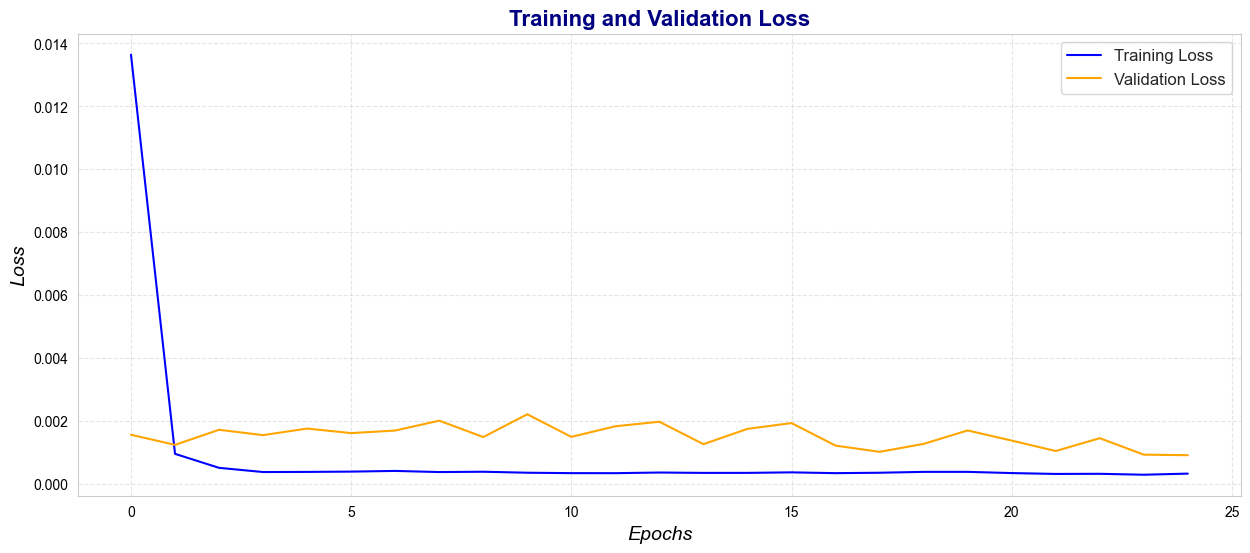

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


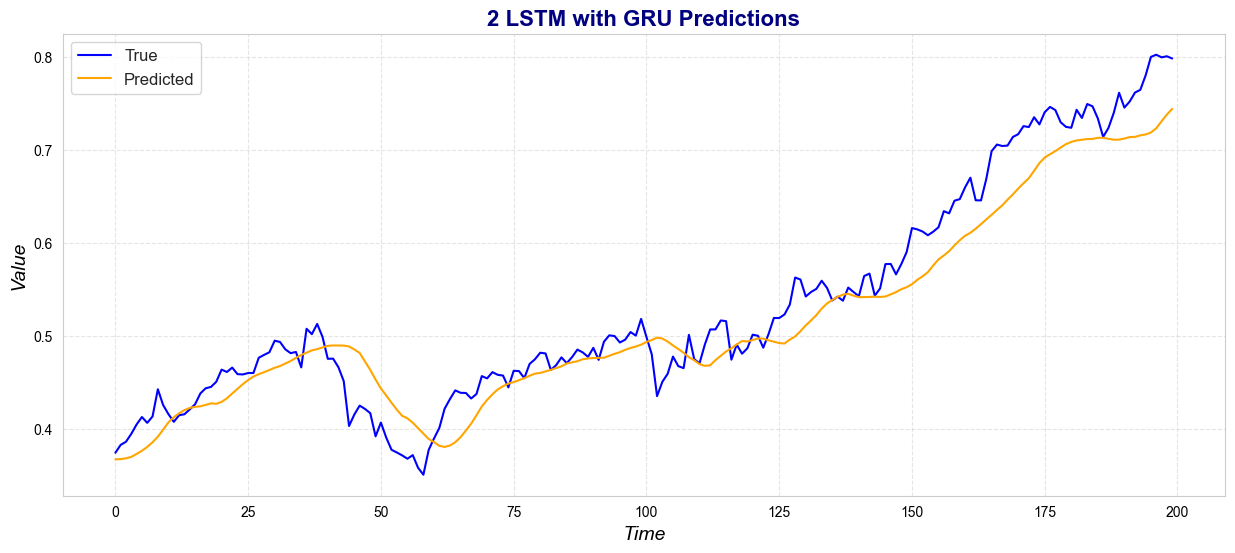

Model      RMSE       MAE        R2       MSE      MAPE  MSLE
6  2 LSTM with GRU  0.034417  0.028217  0.913711  0.001185  22.03805     0

In [45]:
plot_train_history(history_lstm_gru)
best_model = load_model('best_model.keras')
test_model(model_lstm_gru, '2 LSTM with GRU',
           X_test, y_test, 200)

In [46]:
from keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(32, return_sequences=True, input_shape=(10, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(16))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.001))
model_gru.summary()


c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 10, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,777 (22.57 KB)

 Trainable params: 5,777 (22.57 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history_gru = model_gru.fit(X_train, y_train,
                    epochs=40, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0525 - val_loss: 0.0056
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0071 - val_loss: 7.8025e-04
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1519e-04 - val_loss: 9.4197e-04
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2672e-04 - val_loss: 7.8686e-04
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9134e-04 - val_loss: 0.0011
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6569e-04 - val_loss: 9.9588e-04
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.5056e-04 - val_loss: 7.9254e-04
Epoch 9/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2567e-04 - val_loss: 0.0010
Epoch 10/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5134e-04 - val_loss: 8.3857e-04
Epoch 11/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.1344e-04 - val_loss: 9.1876e-04
Epo

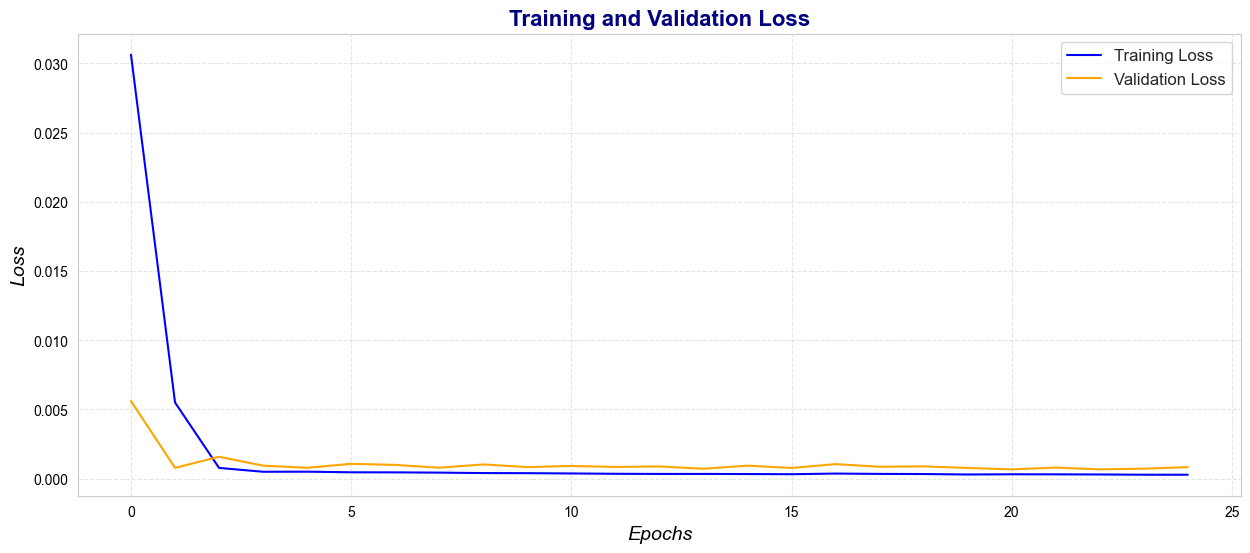

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


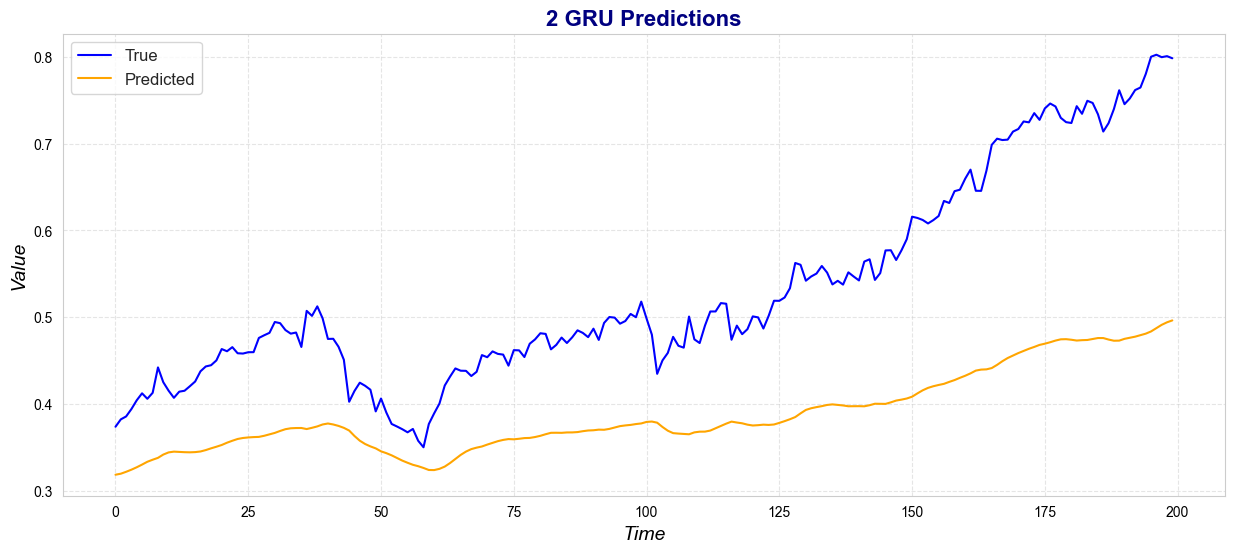

Model      RMSE       MAE        R2       MSE       MAPE  MSLE
7  2 GRU  0.159888  0.142659 -0.862282  0.025564  25.402431     0

In [48]:
plot_train_history(history_gru)
best_model = load_model('best_model.keras')
test_model(model_gru, '2 GRU',
           X_test, y_test, 200)

In [49]:
from keras.layers import Conv1D, MaxPooling1D

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu',
                           input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv.add(MaxPooling1D(pool_size=2)),
model_conv.add(Dropout(0.2)),
model_conv.add(LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True)),
model_conv.add(LSTM(16, return_sequences=False)),
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))
model_conv.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,825 (61.82 KB)

 Trainable params: 15,825 (61.82 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history_conv = model_conv.fit(X_train, y_train,
                    epochs=100, batch_size=256,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 6.9924e-04 - val_loss: 0.0016
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.1823e-04 - val_loss: 0.0017
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.2511e-04 - val_loss: 0.0017
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.0898e-04 - val_loss: 0.0017
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.7486e-04 - val_loss: 0.0017
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6836e-04 - val_loss: 0.0018
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1881e-04 - val_loss: 0.0018
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.6126e-04 - val_loss: 0.0018
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.6268e-04 - val_loss: 0.0018
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.4867e-04 - val_loss: 0.0018
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.1339e-04 - val_loss: 0.0018
Epoch 12/100
4/4 ━━━━━━━━━━━━━

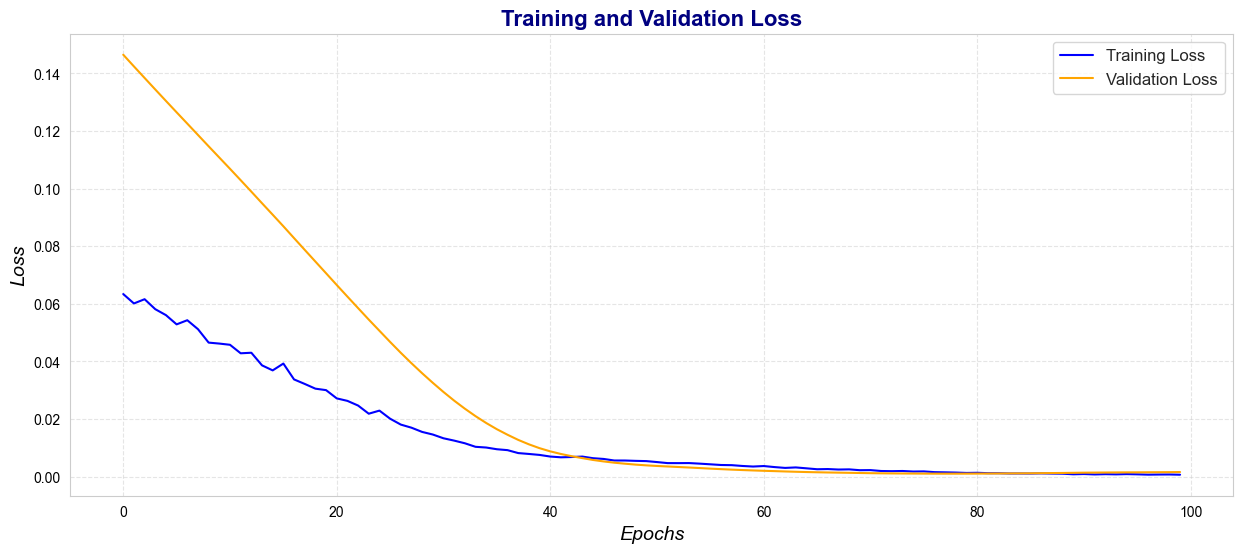

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


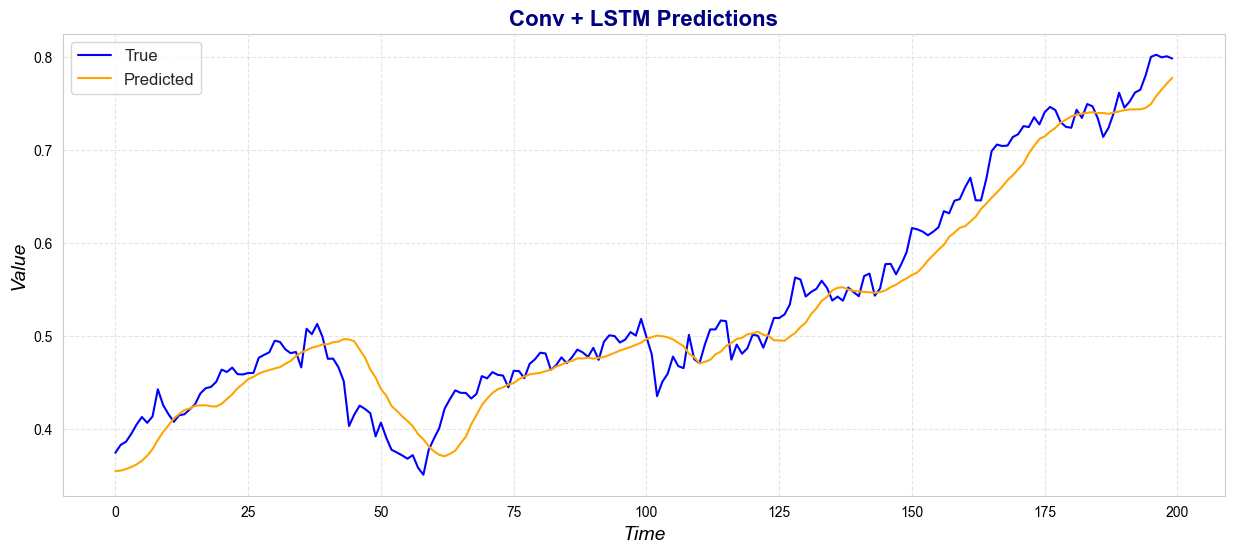

Model     RMSE       MAE        R2      MSE       MAPE  MSLE
8  Conv + LSTM  0.02915  0.023693  0.938102  0.00085  23.178724     0

In [51]:
plot_train_history(history_conv)
best_model = load_model('best_model.keras')
test_model(model_conv, 'Conv + LSTM',
           X_test, y_test, 200)

In [52]:
from keras.layers import Conv1D, MaxPooling1D

model_conv_rnn = Sequential()
model_conv_rnn.add(Conv1D(64, kernel_size=3, activation='relu',
                           input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv_rnn.add(MaxPooling1D(pool_size=2)),
model_conv_rnn.add(Dropout(0.2)),
model_conv_rnn.add(SimpleRNN(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True)),
model_conv_rnn.add(Dropout(0.2)),
model_conv_rnn.add(SimpleRNN(16, return_sequences=False)),
model_conv_rnn.add(Dense(1))

model_conv_rnn.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))
model_conv_rnn.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 4, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,161 (16.25 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history_conv_rnn = model_conv_rnn.fit(X_train, y_train,
                    epochs=100, batch_size=256,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - val_lo

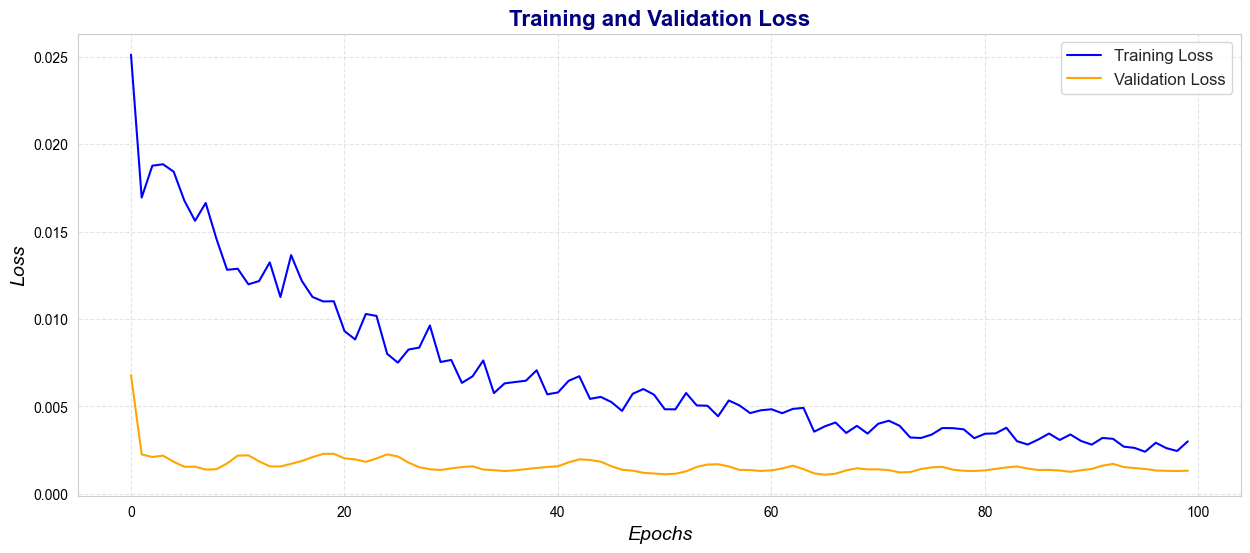

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


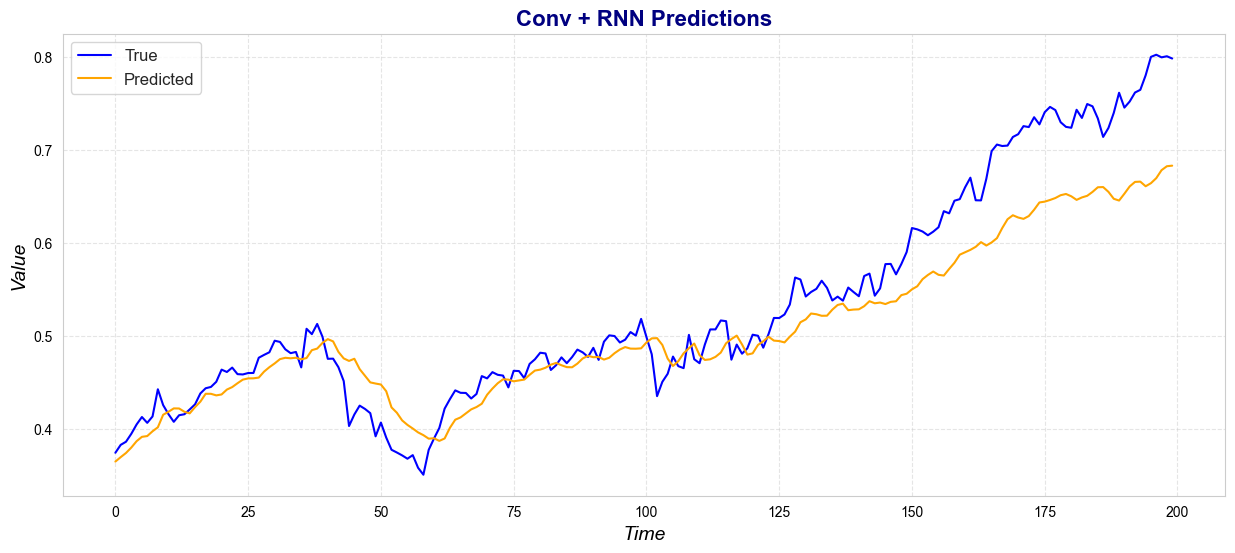

Model      RMSE       MAE        R2       MSE      MAPE  MSLE
9  Conv + RNN  0.048635  0.036163  0.827688  0.002365  20.34962     0

In [54]:
plot_train_history(history_conv_rnn)
best_model = load_model('best_model.keras')
test_model(model_conv_rnn, 'Conv + RNN',
           X_test, y_test, 200)

In [55]:
model_conv_gru = Sequential()
model_conv_gru.add(Conv1D(64, kernel_size=3, activation='relu',
                           input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv_gru.add(MaxPooling1D(pool_size=2)),
model_conv_gru.add(Dropout(0.2)),
model_conv_gru.add(GRU(64, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True)),
model_conv_gru.add(Dropout(0.2)),
model_conv_gru.add(GRU(32, return_sequences=False)),
model_conv_gru.add(Dense(1))

model_conv_gru.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))
model_conv_gru.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,657 (135.38 KB)

 Trainable params: 34,657 (135.38 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
history_conv_gru = model_conv_gru.fit(X_train, y_train,
                    epochs=100, batch_size=256,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 7.2619e-04 - val_loss: 0.0013
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.5506e-04 - val_loss: 0.0012
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.7523e-04 - val_loss: 0.0011
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.5067e-04 - val_loss: 0.0012
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.7089e-04 - val_loss: 0.0013
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.8162e-04 - val_loss: 0.0014
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.1385e-04 - val_loss: 0.0014
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8099e-04 - val_loss: 0.0013
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.7994e-04 - val_loss: 0.0013
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.6546e-04 - val_loss: 0.0013
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.5661e-04 - val_loss: 0.0013
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3

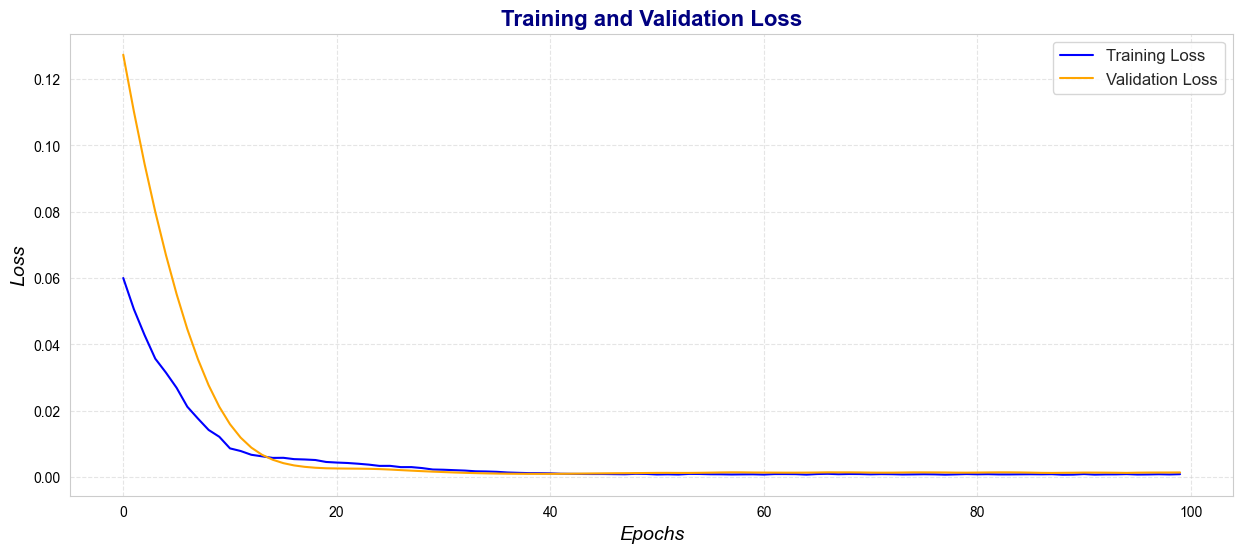

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


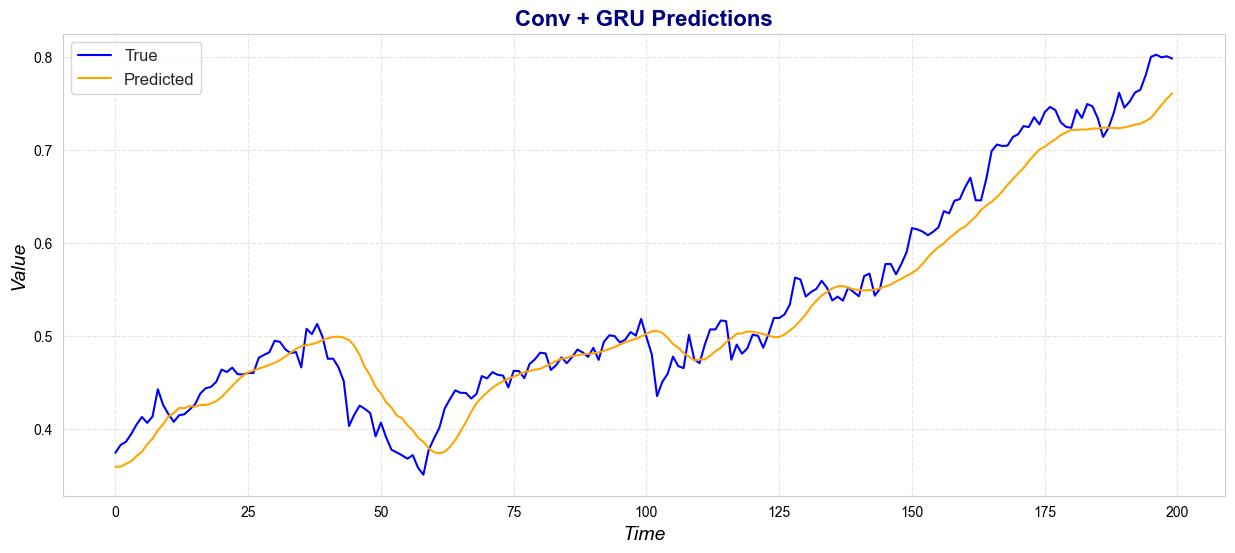

Model      RMSE       MAE       R2       MSE       MAPE  MSLE
10  Conv + GRU  0.028331  0.022733  0.94153  0.000803  22.684258     0

In [57]:
plot_train_history(history_conv_gru)
best_model = load_model('best_model.keras')
test_model(model_conv_gru, 'Conv + GRU',
           X_test, y_test, 200)

In [91]:
all_results.sort_values(by="MSE")

Model      RMSE       MAE         R2  \
0                               Simple RNN  0.013022  0.009576   0.896533   
1                       2 RNN with dropout  0.019103  0.016403   0.777336   
10                              Conv + GRU  0.028331  0.022733   0.941530   
8                              Conv + LSTM  0.029150  0.023693   0.938102   
11             2 RNN with dropout - Adamax  0.034136  0.028494   0.915115   
6                          2 LSTM with GRU  0.034417  0.028217   0.913711   
16            2 RNN with dropout - RMSprop  0.037040  0.026741   0.900055   
4                      2 LSTM with dropout  0.041542  0.036164   0.874285   
3                              Simple LSTM  0.042239  0.038315   0.870033   
14              2 RNN with dropout - Nadam  0.043624  0.038864   0.861369   
9                               Conv + RNN  0.048635  0.036163   0.827688   
18  2 RNN with dropout - Adamax - LR 0.015  0.054480  0.051139   0.783784   
2                       3 RNN with dropout  0.057471  0.055181  -1.015223   
5               Multiple LSTM with dropout  0.064270  0.051498   0.699097   
13            2 RNN with dropout - Adagrad  0.098634  0.086397   0.291296   
12                2 RNN with dropout - SGD  0.126684  0.117707  -0.169123   
17  2 RNN with dropout - Adamax - LR 0.001  0.144156  0.137891  -0.513847   
7                                    2 GRU  0.159888  0.142659  -0.862282   
15           2 RNN with dropout - Adadelta  0.702681  0.685944 -34.969249   

         MSE        MAPE  MSLE  
0   0.000170   10.681614     0  
1   0.000365   10.354017     0  
10  0.000803   22.684258     0  
8   0.000850   23.178724     0  
11  0.001165   23.940441     0  
6   0.001185   22.038050     0  
16  0.001372   20.875545     0  
4   0.001726   22.090024     0  
3   0.001784   23.264943     0  
14  0.001903   22.487646     0  
9   0.002365   20.349620     0  
18  0.002968   26.576571     0  
2   0.003303   14.023619     0  
5   0.004131   20.181740     0  
13  0.009729   21.436583     0  
12  0.016049   24.686181     0  
17  0.020781   27.468294     0  
7   0.025564   25.402431     0  
15  0.493761  130.599774     0

Najbolje rezultate daje "Simple RNN", ali postoji mogucnost da je doslo do overfittinga, jer nemamo Dropout slojeve. Iz tog razloga, koristicemo drugi najbolji model, a to je "2 RNN with dropout".

### Isprobavanje sa razlicitim optimizerima

In [59]:
model_rnn_2_adamax = Sequential()
model_rnn_2_adamax.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_adamax.add(Dropout(0.2))
model_rnn_2_adamax.add(SimpleRNN(100, activation="relu"))
model_rnn_2_adamax.add(Dropout(0.2))
model_rnn_2_adamax.add(Dense(1))


model_rnn_2_adamax.compile(loss='mean_squared_error', optimizer=optimizers.Adamax(learning_rate=0.01))
model_rnn_2_adamax.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history_rnn_adamax = model_rnn_2_adamax.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1361 - val_loss: 0.0032
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 4.9505e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - val_loss: 4.5497e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 5.6685e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 7.6211e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 4.5262e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 5.4577e-04


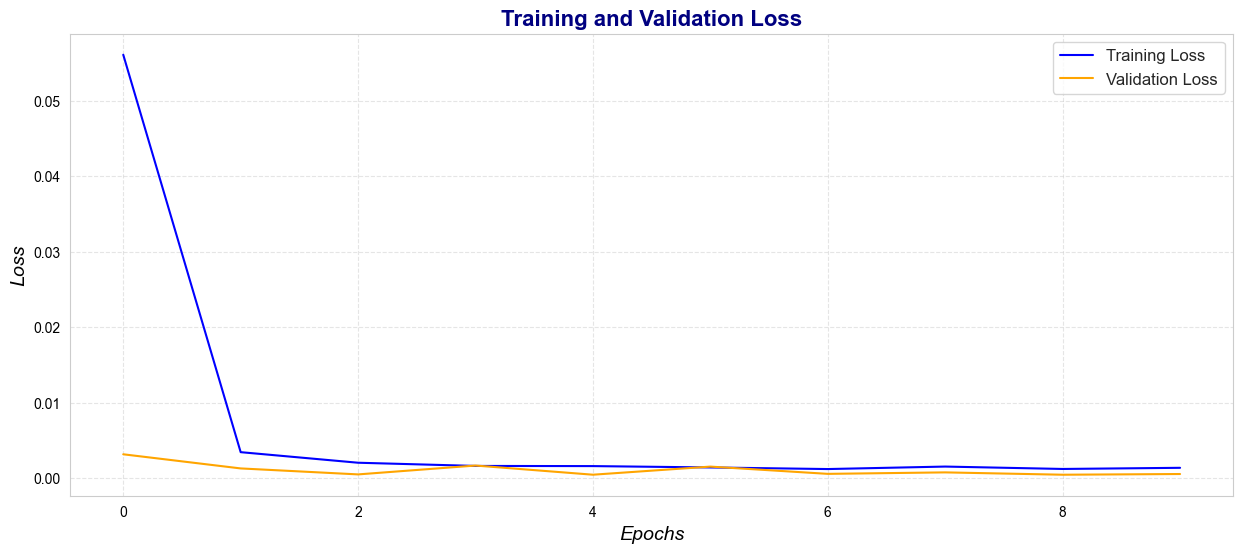

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


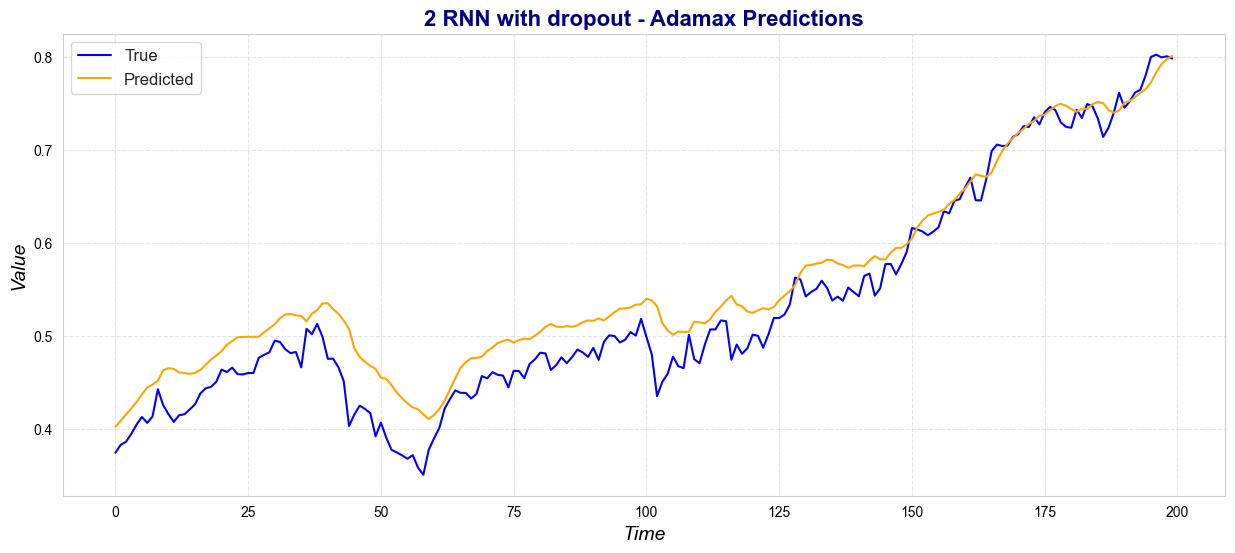

Model      RMSE       MAE        R2       MSE  \
11  2 RNN with dropout - Adamax  0.034136  0.028494  0.915115  0.001165   

         MAPE  MSLE  
11  23.940441     0

In [61]:
plot_train_history(history_rnn_adamax)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_adamax, '2 RNN with dropout - Adamax',
           X_test, y_test, 200)

In [62]:
model_rnn_2_sgd = Sequential()
model_rnn_2_sgd.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_sgd.add(Dropout(0.2))
model_rnn_2_sgd.add(SimpleRNN(100, activation="relu"))
model_rnn_2_sgd.add(Dropout(0.2))
model_rnn_2_sgd.add(Dense(1))


model_rnn_2_sgd.compile(loss='mean_squared_error', optimizer=optimizers.SGD(learning_rate=0.01))
model_rnn_2_sgd.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history_rnn_sgd = model_rnn_2_sgd.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 9.9176e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - val_loss: 9.8796e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 7.4700e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 7.3110e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - val_loss: 7.7080e-04


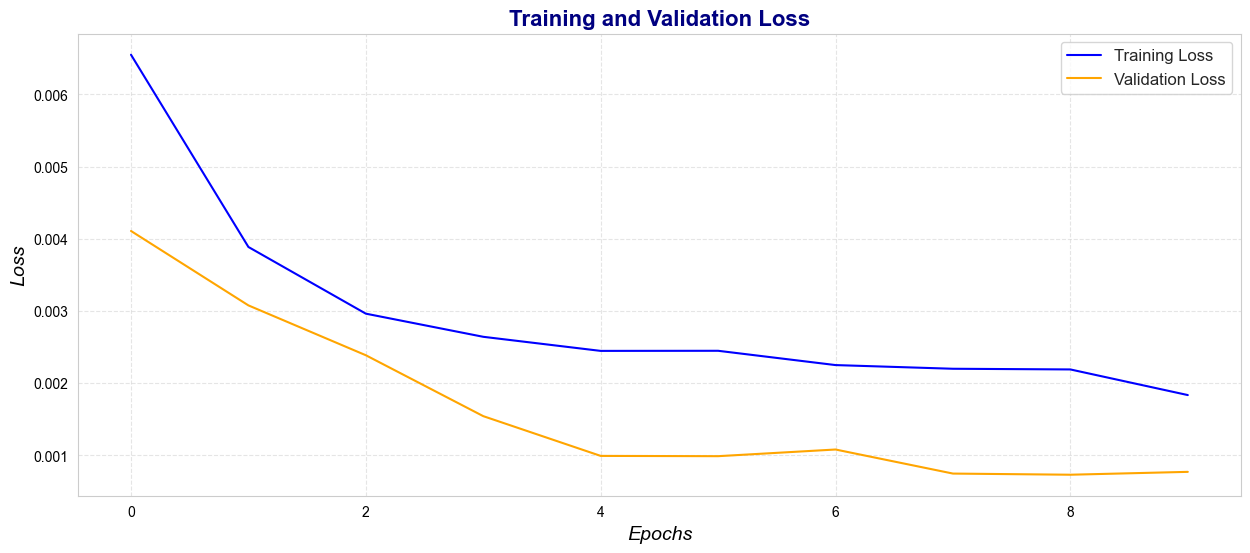

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


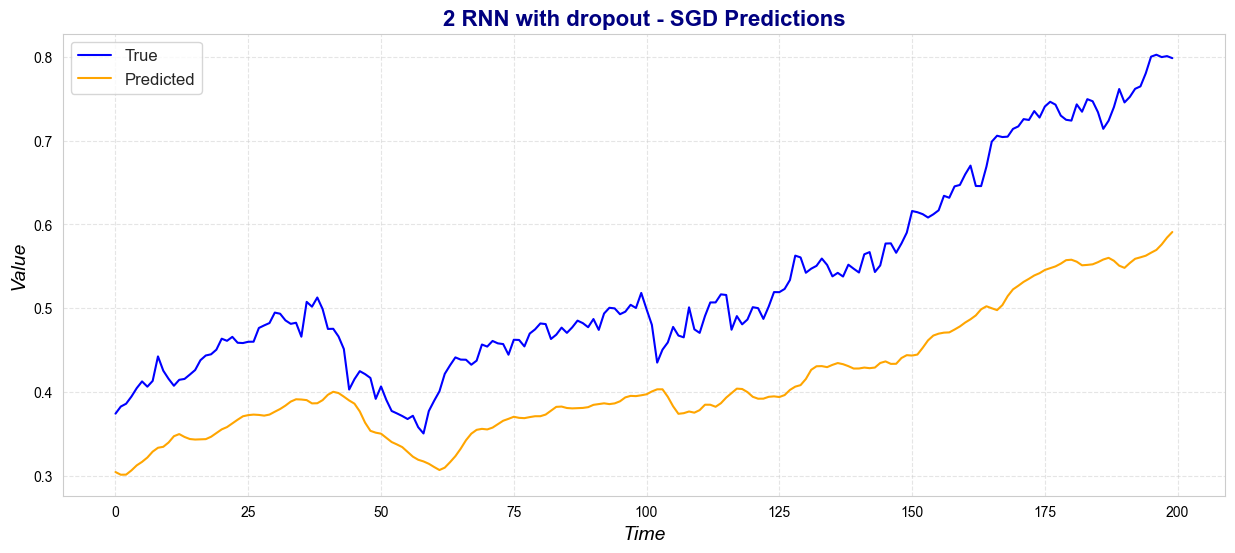

Model      RMSE       MAE        R2       MSE  \
12  2 RNN with dropout - SGD  0.126684  0.117707 -0.169123  0.016049   

         MAPE  MSLE  
12  24.686181     0

In [64]:
plot_train_history(history_rnn_sgd)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_sgd, '2 RNN with dropout - SGD',
           X_test, y_test, 200)

In [65]:
model_rnn_2_adagrad = Sequential()
model_rnn_2_adagrad.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_adagrad.add(Dropout(0.2))
model_rnn_2_adagrad.add(SimpleRNN(100, activation="relu"))
model_rnn_2_adagrad.add(Dropout(0.2))
model_rnn_2_adagrad.add(Dense(1))


model_rnn_2_adagrad.compile(loss='mean_squared_error', optimizer=optimizers.Adagrad(learning_rate=0.01))
model_rnn_2_adagrad.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history_rnn_adagrad = model_rnn_2_adagrad.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0177 - val_loss: 0.0020
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - val_loss: 8.1110e-04
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 6.0193e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 8.4174e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - val_loss: 6.4330e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 6.8718e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 6.0922e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 - val_loss: 6.4181e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - val_loss: 6.5849e-04


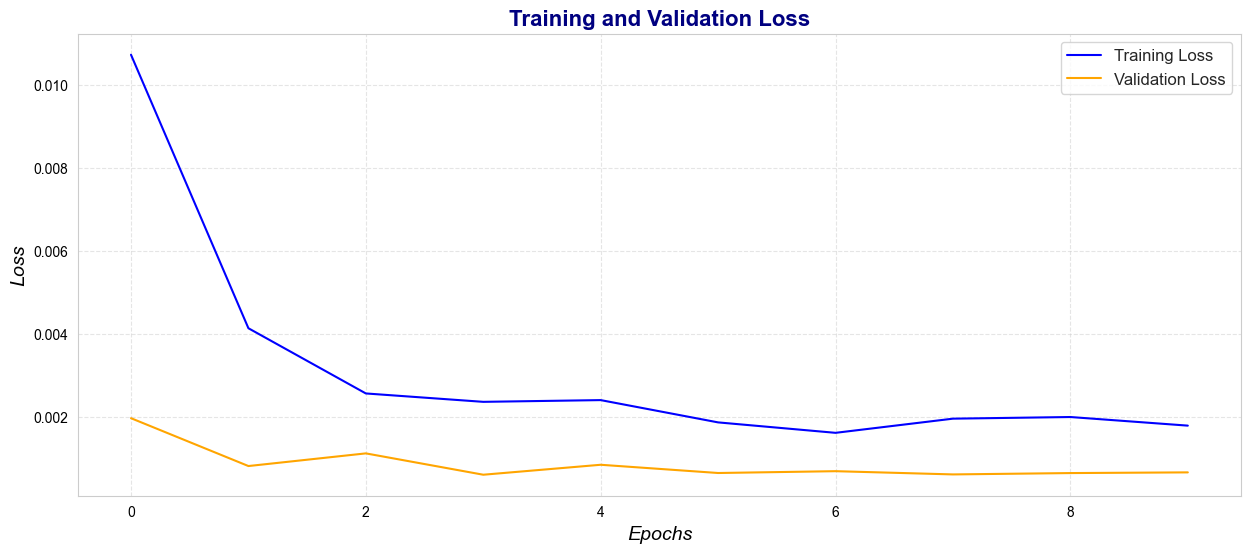

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


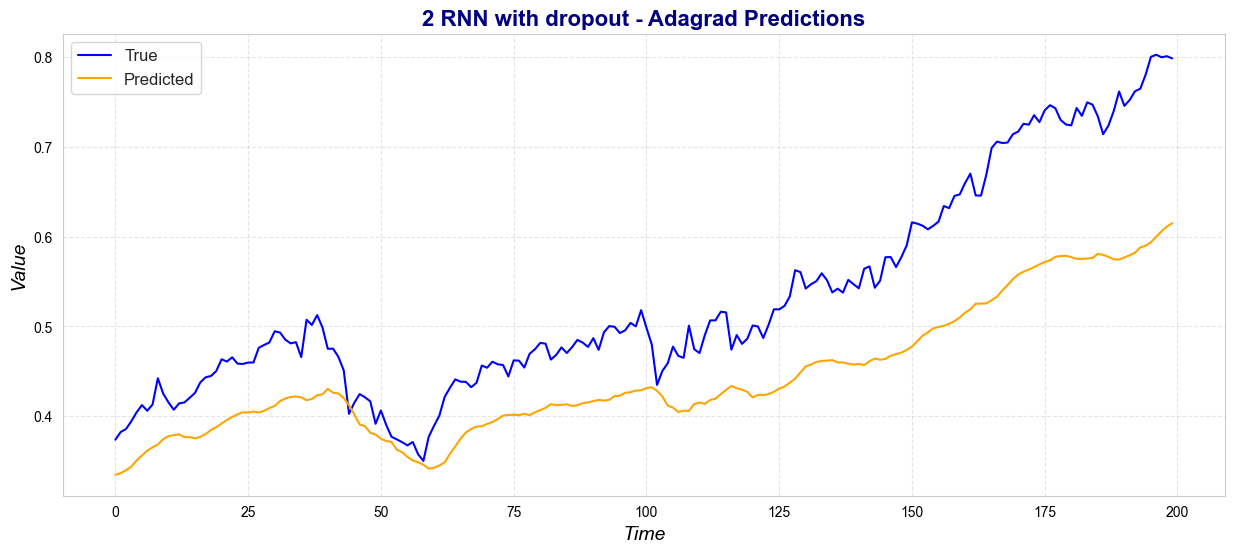

Model      RMSE       MAE        R2       MSE  \
13  2 RNN with dropout - Adagrad  0.098634  0.086397  0.291296  0.009729   

         MAPE  MSLE  
13  21.436583     0

In [67]:
plot_train_history(history_rnn_adagrad)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_adagrad, '2 RNN with dropout - Adagrad',
           X_test, y_test, 200)

In [68]:
model_rnn_2_nadam = Sequential()
model_rnn_2_nadam.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_nadam.add(Dropout(0.2))
model_rnn_2_nadam.add(SimpleRNN(100, activation="relu"))
model_rnn_2_nadam.add(Dropout(0.2))
model_rnn_2_nadam.add(Dense(1))


model_rnn_2_nadam.compile(loss='mean_squared_error', optimizer=optimizers.Nadam(learning_rate=0.01))
model_rnn_2_nadam.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_14 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_15 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history_rnn_nadam = model_rnn_2_nadam.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 2.1182 - val_loss: 7.4610e-04
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - val_loss: 7.8217e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 6.4624e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 9.4641e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - val_loss: 5.5115e-04


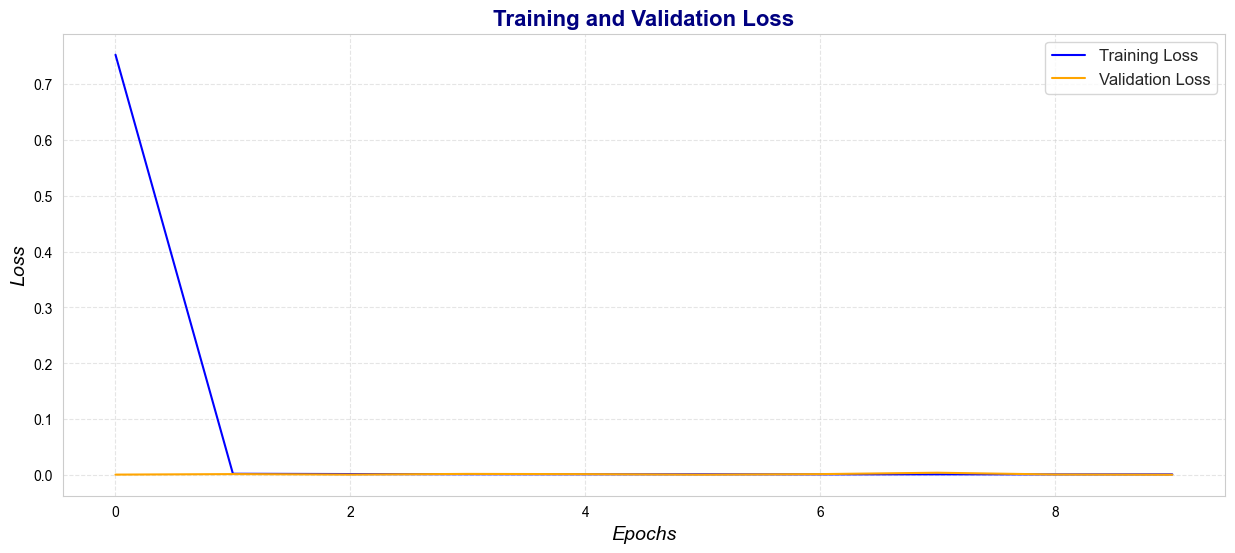

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


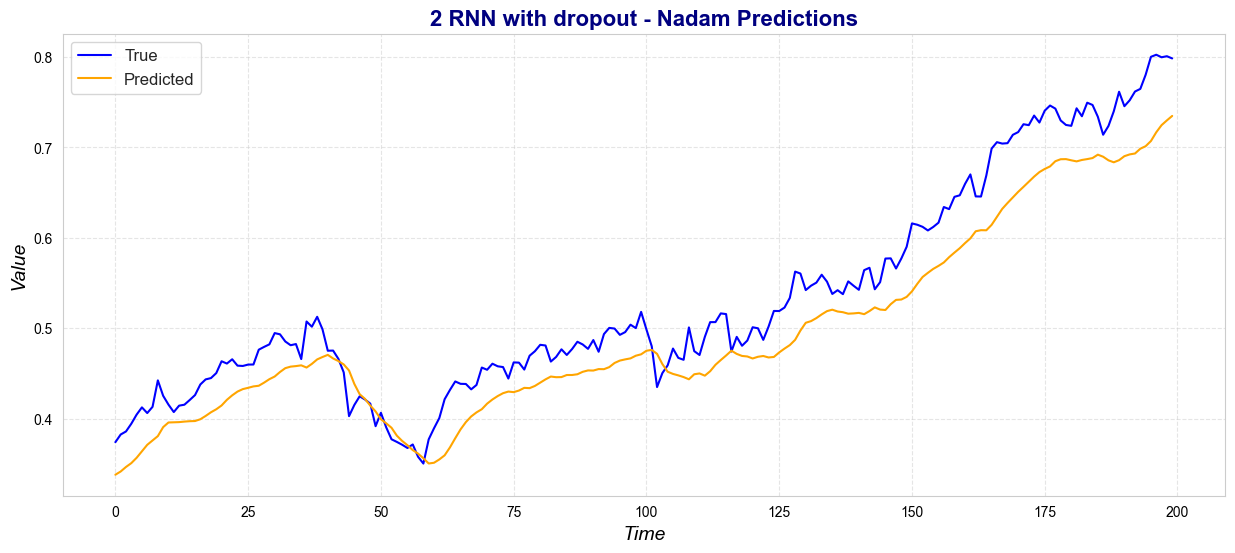

Model      RMSE       MAE        R2       MSE  \
14  2 RNN with dropout - Nadam  0.043624  0.038864  0.861369  0.001903   

         MAPE  MSLE  
14  22.487646     0

In [70]:
plot_train_history(history_rnn_nadam)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_nadam, '2 RNN with dropout - Nadam',
           X_test, y_test, 200)

In [71]:
model_rnn_2_adadelta = Sequential()
model_rnn_2_adadelta.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_adadelta.add(Dropout(0.2))
model_rnn_2_adadelta.add(SimpleRNN(100, activation="relu"))
model_rnn_2_adadelta.add(Dropout(0.2))
model_rnn_2_adadelta.add(Dense(1))


model_rnn_2_adadelta.compile(loss='mean_squared_error', optimizer=optimizers.Adadelta(learning_rate=0.01))
model_rnn_2_adadelta.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_16 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_17 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history_rnn_adadelta = model_rnn_2_adadelta.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1374 - val_loss: 0.2539
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1188 - val_loss: 0.2183
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1034 - val_loss: 0.1890
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0846 - val_loss: 0.1659
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0815 - val_loss: 0.1487
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0754 - val_loss: 0.1333
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0652 - val_loss: 0.1192
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0623 - val_loss: 0.1054
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0492 - val_loss: 0.0923
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0460 - val_loss: 0.0788


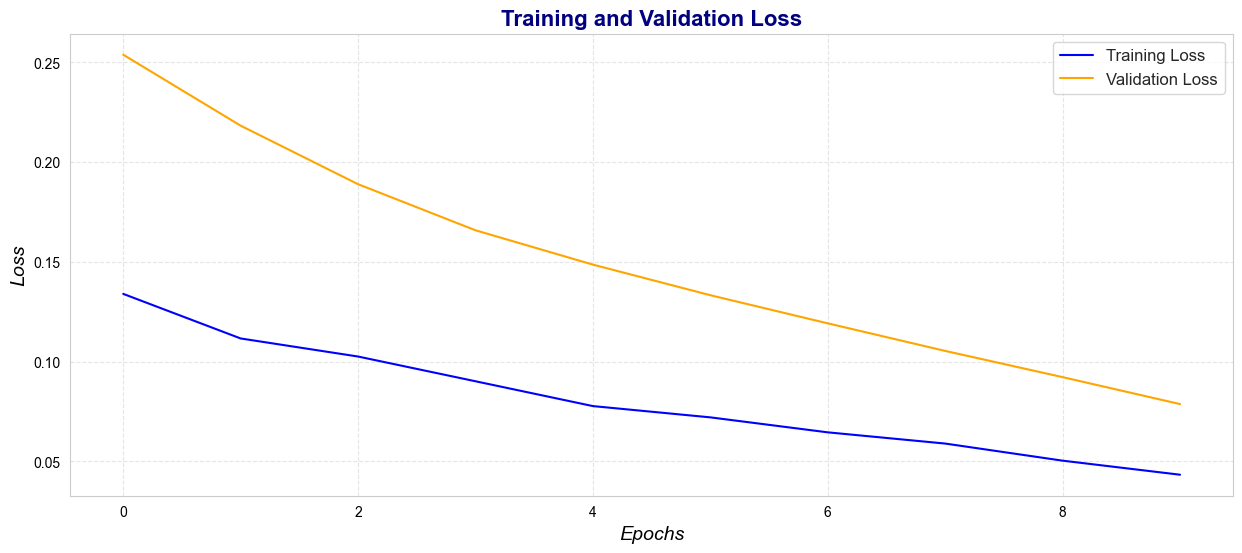

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


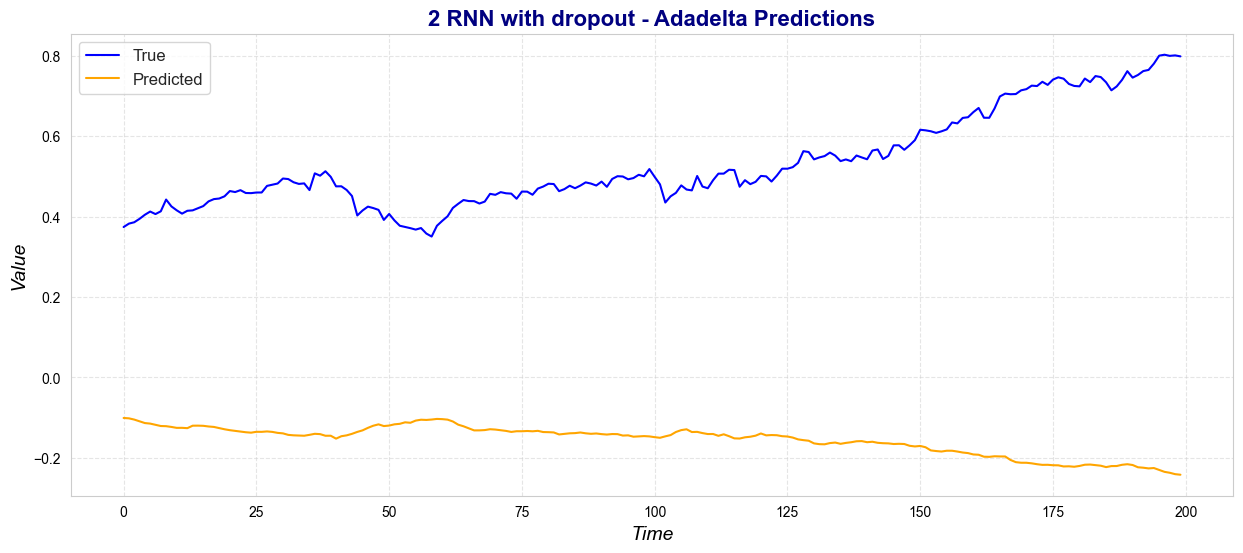

Model      RMSE       MAE         R2       MSE  \
15  2 RNN with dropout - Adadelta  0.702681  0.685944 -34.969249  0.493761   

          MAPE  MSLE  
15  130.599774     0

In [73]:
plot_train_history(history_rnn_adadelta)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_adadelta, '2 RNN with dropout - Adadelta',
           X_test, y_test, 200)

In [74]:
model_rnn_2_rmsprop = Sequential()
model_rnn_2_rmsprop.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_rmsprop.add(Dropout(0.2))
model_rnn_2_rmsprop.add(SimpleRNN(100, activation="relu"))
model_rnn_2_rmsprop.add(Dropout(0.2))
model_rnn_2_rmsprop.add(Dense(1))


model_rnn_2_rmsprop.compile(loss='mean_squared_error', optimizer=optimizers.RMSprop(learning_rate=0.01))
model_rnn_2_rmsprop.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_18 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_19 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history_rnn_rmsprop = model_rnn_2_rmsprop.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 11.6873 - val_loss: 8.1608e-04
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - val_loss: 0.0017
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - val_loss: 0.0120
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - val_loss: 0.0163
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - val_loss: 0.0316
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0025
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0047 - val_loss: 0.0585
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095 - val_loss: 0.0021


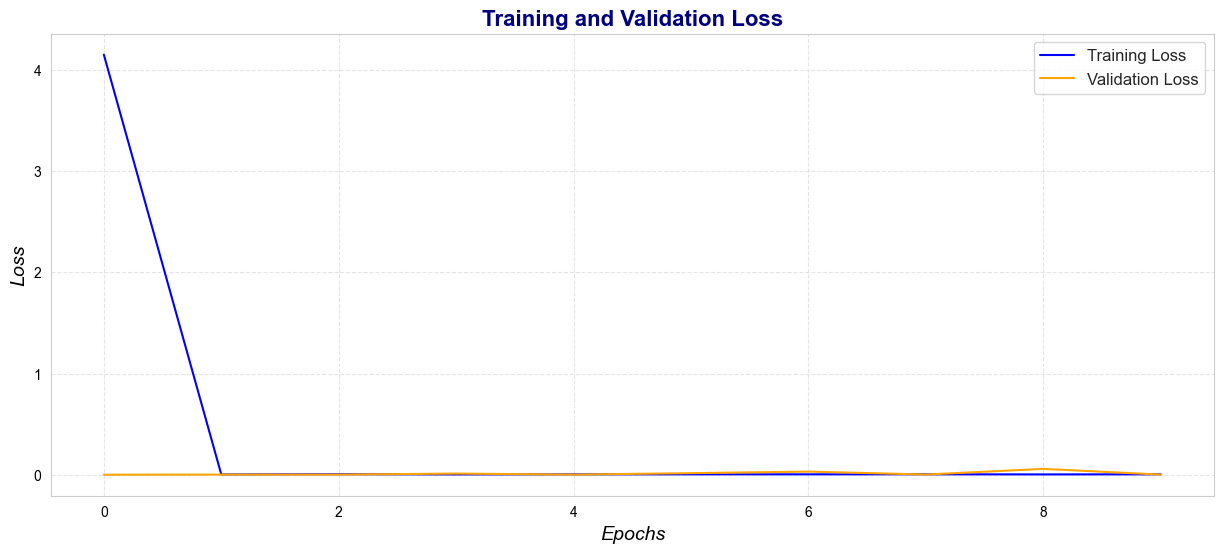

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


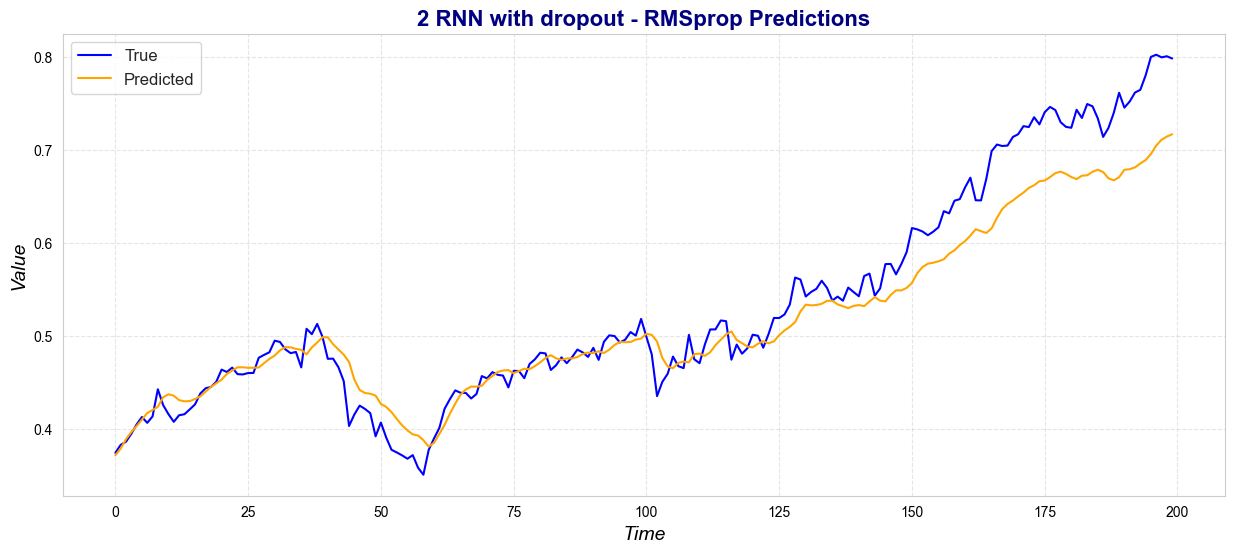

Model     RMSE       MAE        R2       MSE  \
16  2 RNN with dropout - RMSprop  0.03704  0.026741  0.900055  0.001372   

         MAPE  MSLE  
16  20.875545     0

In [76]:
plot_train_history(history_rnn_rmsprop)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_rmsprop, '2 RNN with dropout - RMSprop',
           X_test, y_test, 200)

In [77]:
all_results.sort_values(by="MSE")

Model      RMSE       MAE         R2       MSE  \
0                      Simple RNN  0.013022  0.009576   0.896533  0.000170   
1              2 RNN with dropout  0.019103  0.016403   0.777336  0.000365   
10                     Conv + GRU  0.028331  0.022733   0.941530  0.000803   
8                     Conv + LSTM  0.029150  0.023693   0.938102  0.000850   
11    2 RNN with dropout - Adamax  0.034136  0.028494   0.915115  0.001165   
6                 2 LSTM with GRU  0.034417  0.028217   0.913711  0.001185   
16   2 RNN with dropout - RMSprop  0.037040  0.026741   0.900055  0.001372   
4             2 LSTM with dropout  0.041542  0.036164   0.874285  0.001726   
3                     Simple LSTM  0.042239  0.038315   0.870033  0.001784   
14     2 RNN with dropout - Nadam  0.043624  0.038864   0.861369  0.001903   
9                      Conv + RNN  0.048635  0.036163   0.827688  0.002365   
2              3 RNN with dropout  0.057471  0.055181  -1.015223  0.003303   
5      Multiple LSTM with dropout  0.064270  0.051498   0.699097  0.004131   
13   2 RNN with dropout - Adagrad  0.098634  0.086397   0.291296  0.009729   
12       2 RNN with dropout - SGD  0.126684  0.117707  -0.169123  0.016049   
7                           2 GRU  0.159888  0.142659  -0.862282  0.025564   
15  2 RNN with dropout - Adadelta  0.702681  0.685944 -34.969249  0.493761   

          MAPE  MSLE  
0    10.681614     0  
1    10.354017     0  
10   22.684258     0  
8    23.178724     0  
11   23.940441     0  
6    22.038050     0  
16   20.875545     0  
4    22.090024     0  
3    23.264943     0  
14   22.487646     0  
9    20.349620     0  
2    14.023619     0  
5    20.181740     0  
13   21.436583     0  
12   24.686181     0  
7    25.402431     0  
15  130.599774     0

Najbolje rezultate daje model "Simple RNN", ali postoji mogucnost da je doslo do overfittinga, jer nemamo Dropout slojeve"2 RNN with dropout" sa Adam optimizerom, pa cemo dalji rad nastaviti sa tim modelom.

### Podesavanje LR

#### Adam sa razlicitim vrednostima LR

In [92]:
model_rnn_2_lr_001 = Sequential()
model_rnn_2_lr_001.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_lr_001.add(Dropout(0.2))
model_rnn_2_lr_001.add(SimpleRNN(100, activation="relu"))
model_rnn_2_lr_001.add(Dropout(0.2))
model_rnn_2_lr_001.add(Dense(1))


model_rnn_2_lr_001.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.001))
model_rnn_2_lr_001.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_24 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_25 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history_rnn_lr_001 = model_rnn_2_lr_001.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0352 - val_loss: 0.0011
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 5.4212e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 8.1815e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 5.6424e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 7.8942e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 5.6496e-04


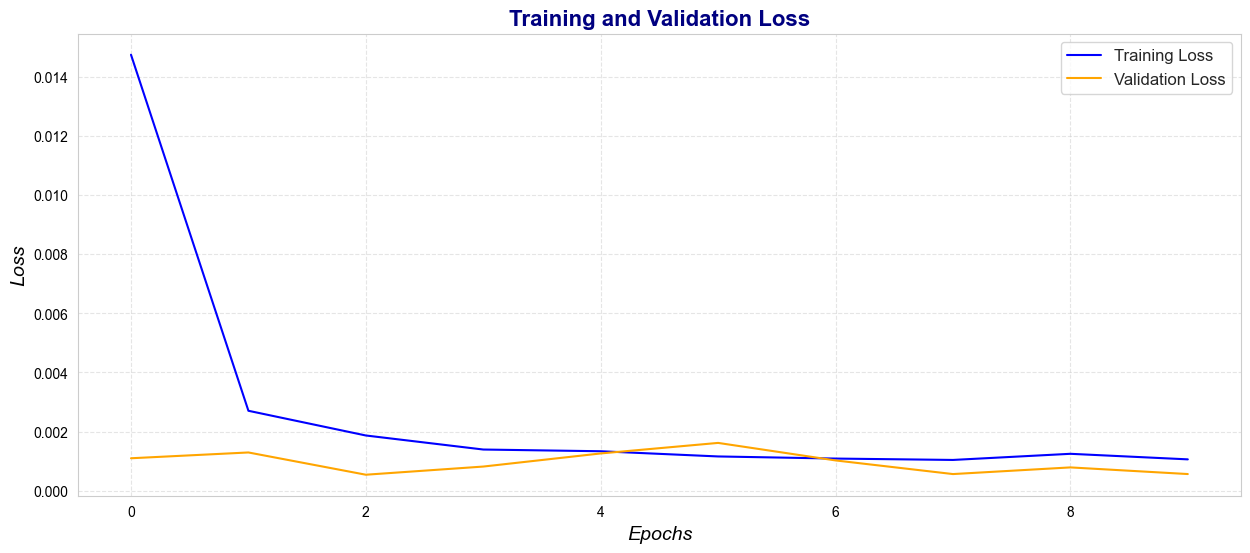

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


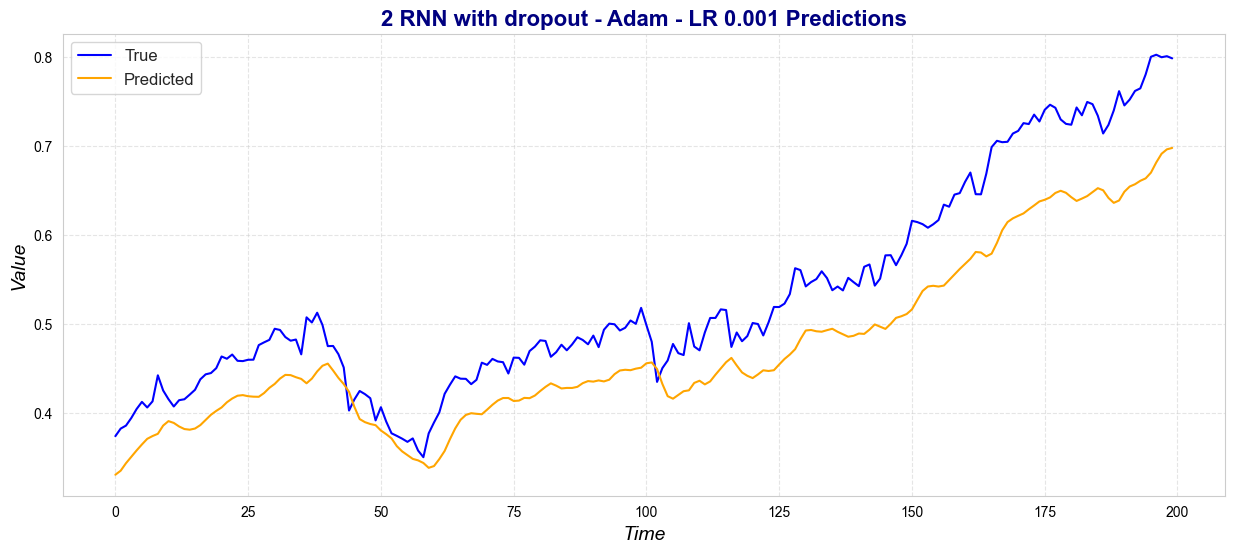

Model      RMSE       MAE        R2  \
19  2 RNN with dropout - Adam - LR 0.001  0.064085  0.058239  0.700828   

         MSE       MAPE  MSLE  
19  0.004107  22.193025     0

In [94]:
plot_train_history(history_rnn_lr_001)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_lr_001, '2 RNN with dropout - Adam - LR 0.001',
           X_test, y_test, 200)

In [101]:
model_rnn_2_lr_0001 = Sequential()
model_rnn_2_lr_0001.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_lr_0001.add(Dropout(0.2))
model_rnn_2_lr_0001.add(SimpleRNN(100, activation="relu"))
model_rnn_2_lr_0001.add(Dropout(0.2))
model_rnn_2_lr_0001.add(Dense(1))


model_rnn_2_lr_0001.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))
model_rnn_2_lr_0001.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_30 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_31 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history_rnn_lr_0001 = model_rnn_2_lr_0001.fit(X_train, y_train,
                    epochs=100, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/100


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2794e-04 - val_loss: 4.2736e-04
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.6650e-04 - val_loss: 4.3246e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0328e-04 - val_loss: 4.6464e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8586e-04 - val_loss: 6.8902e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2479e-04 - val_loss: 4.1161e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9101e-04 - val_loss: 7.1470e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2679e-04 - val_loss: 6.8725e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1905e-04 - val_loss: 4.7021e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2885e-04 - val_loss: 7.2805e-04
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8342e-04 - val_loss: 4.3629e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7866e-04 - v

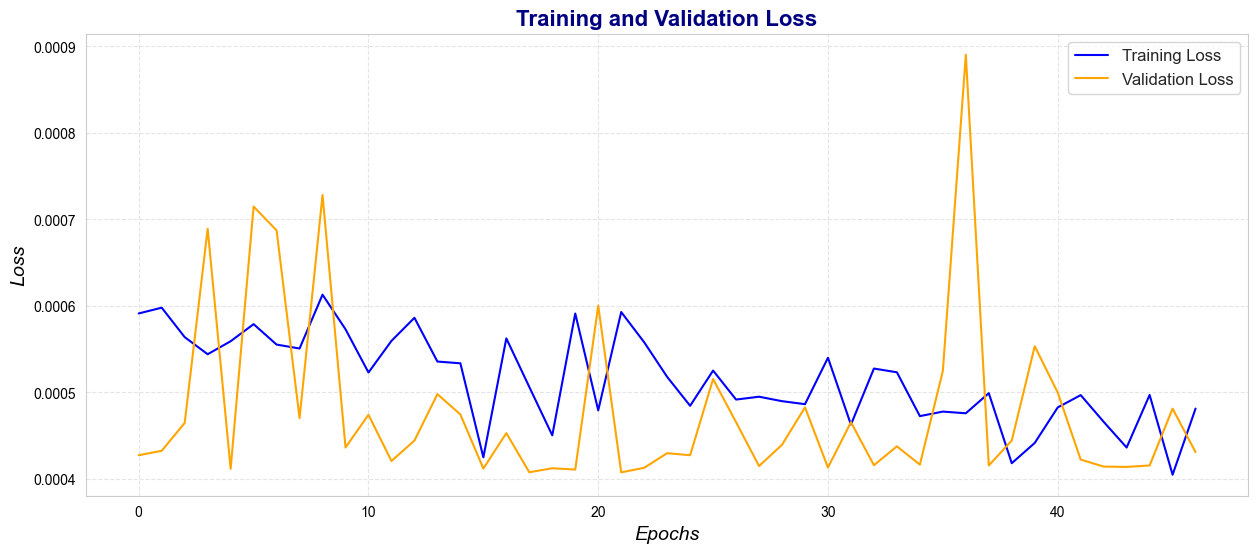

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


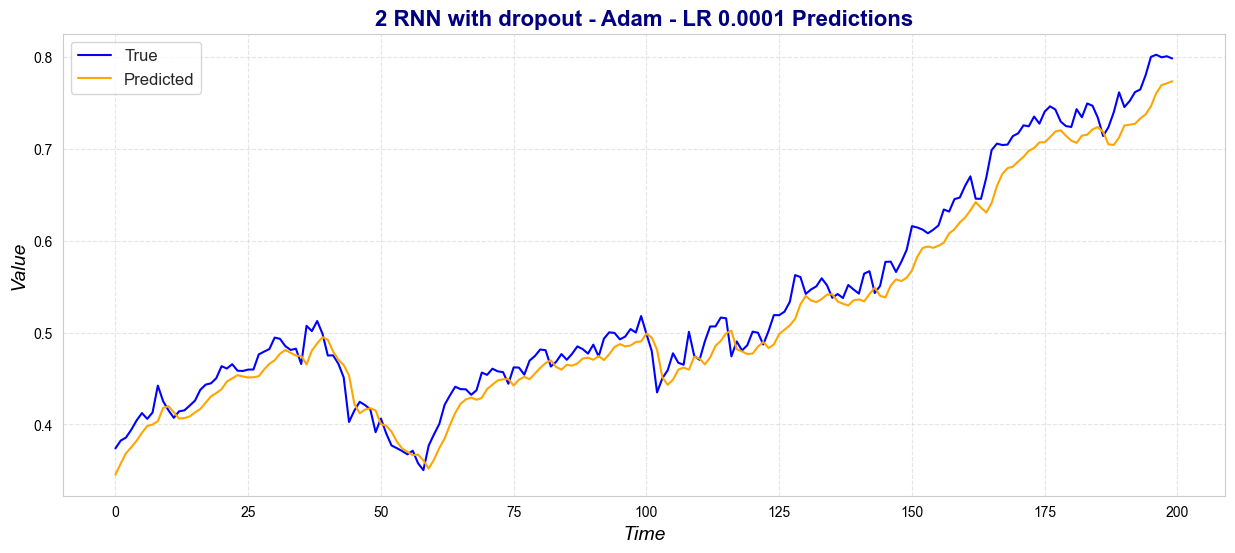

Model      RMSE       MAE      R2  \
21  2 RNN with dropout - Adam - LR 0.0001  0.022598  0.018926  0.9628   

         MSE       MAPE  MSLE  
21  0.000511  23.032037     0

In [105]:
plot_train_history(history_rnn_lr_0001)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_lr_0001, '2 RNN with dropout - Adam - LR 0.0001',
           X_test, y_test, 200)

In [95]:
model_rnn_2_lr_015 = Sequential()
model_rnn_2_lr_015.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_lr_015.add(Dropout(0.2))
model_rnn_2_lr_015.add(SimpleRNN(100, activation="relu"))
model_rnn_2_lr_015.add(Dropout(0.2))
model_rnn_2_lr_015.add(Dense(1))


model_rnn_2_lr_015.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.015))
model_rnn_2_lr_015.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_26 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_27 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history_rnn_lr_015 = model_rnn_2_lr_015.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/50


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1471e-04 - val_loss: 0.0014
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5025e-04 - val_loss: 7.5142e-04
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 8.8068e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7065e-04 - val_loss: 7.0151e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2253e-04 - val_loss: 8.1805e-04
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1756e-04 - val_loss: 6.3348e-04
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.0756e-04 - val_loss: 5.3390e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8654e-04 - val_loss: 5.6183e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1429e-04 - val_loss: 9.2512e-04
Epoch 12/50


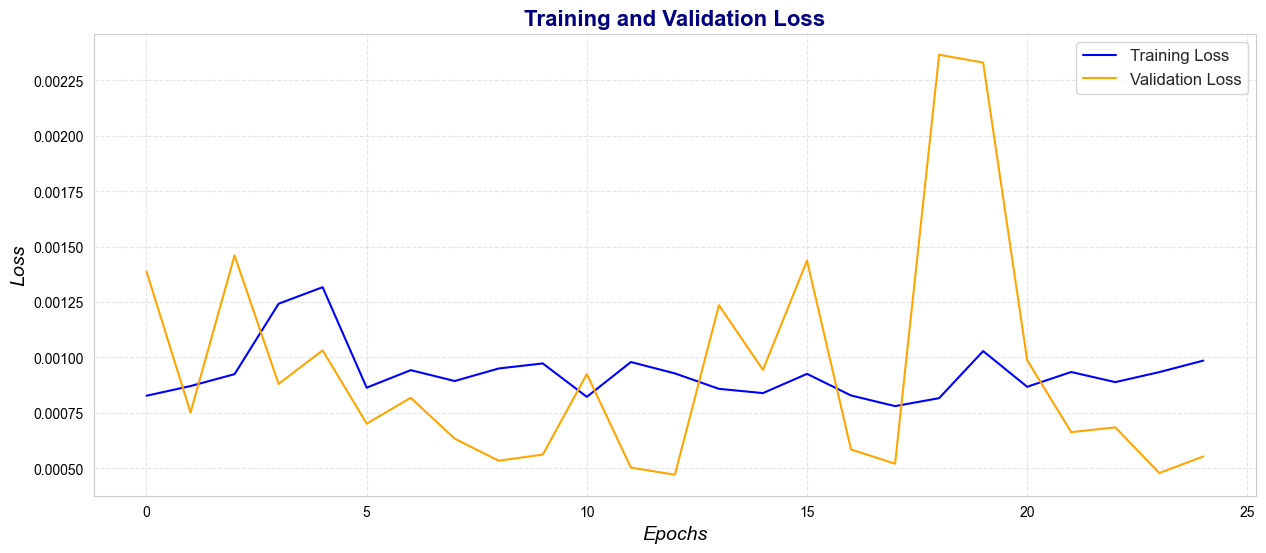

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


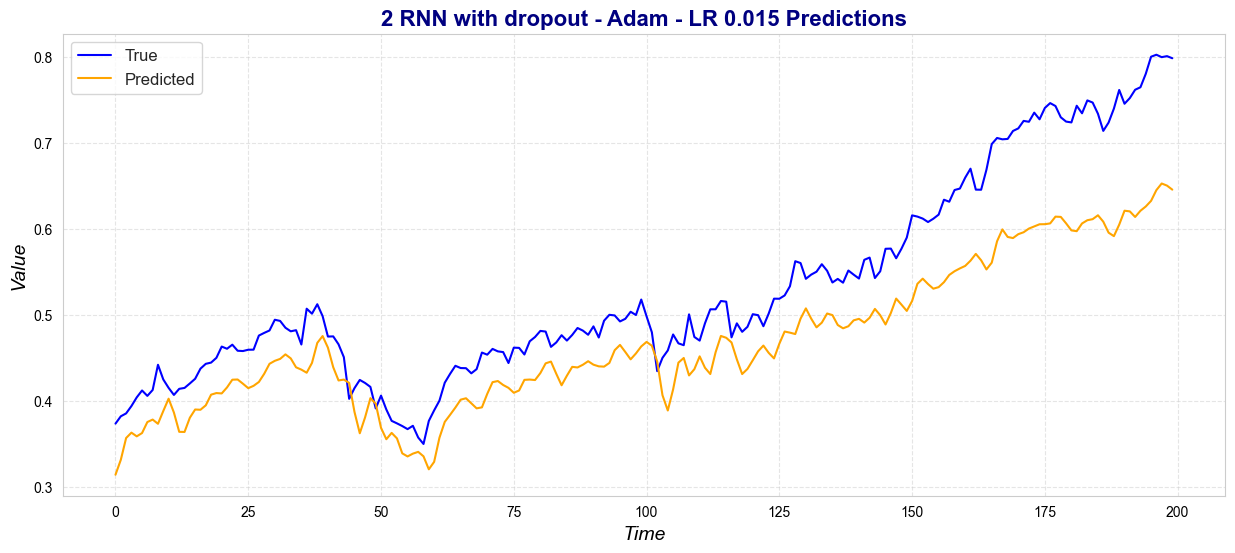

Model      RMSE       MAE        R2  \
22  2 RNN with dropout - Adam - LR 0.015  0.073181  0.062358  0.609871   

         MSE       MAPE  MSLE  
22  0.005355  21.262161     0

In [108]:
plot_train_history(history_rnn_lr_015)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_lr_015, '2 RNN with dropout - Adam - LR 0.015',
           X_test, y_test, 200)

#### Adamax sa razlicitim vrednostima LR

In [78]:
model_rnn_2_adamax_lr_001 = Sequential()
model_rnn_2_adamax_lr_001.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_adamax_lr_001.add(Dropout(0.2))
model_rnn_2_adamax_lr_001.add(SimpleRNN(100, activation="relu"))
model_rnn_2_adamax_lr_001.add(Dropout(0.2))
model_rnn_2_adamax_lr_001.add(Dense(1))


model_rnn_2_adamax_lr_001.compile(loss='mean_squared_error', optimizer=optimizers.Adamax(learning_rate=0.001))
model_rnn_2_adamax_lr_001.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_21 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
history_rnn_adamax_lr_001 = model_rnn_2_adamax_lr_001.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0302 - val_loss: 0.0077
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - val_loss: 6.9857e-04
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 6.0592e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 6.1122e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 5.9486e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 5.8091e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 7.3023e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 5.7594e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 6.5957e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 5.5855e-04


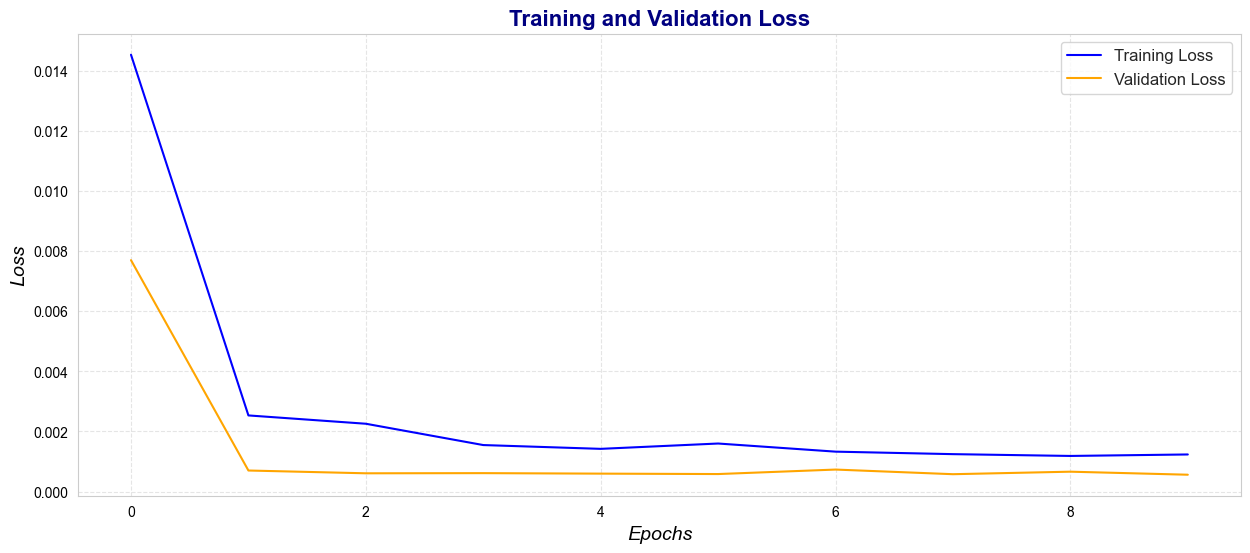

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


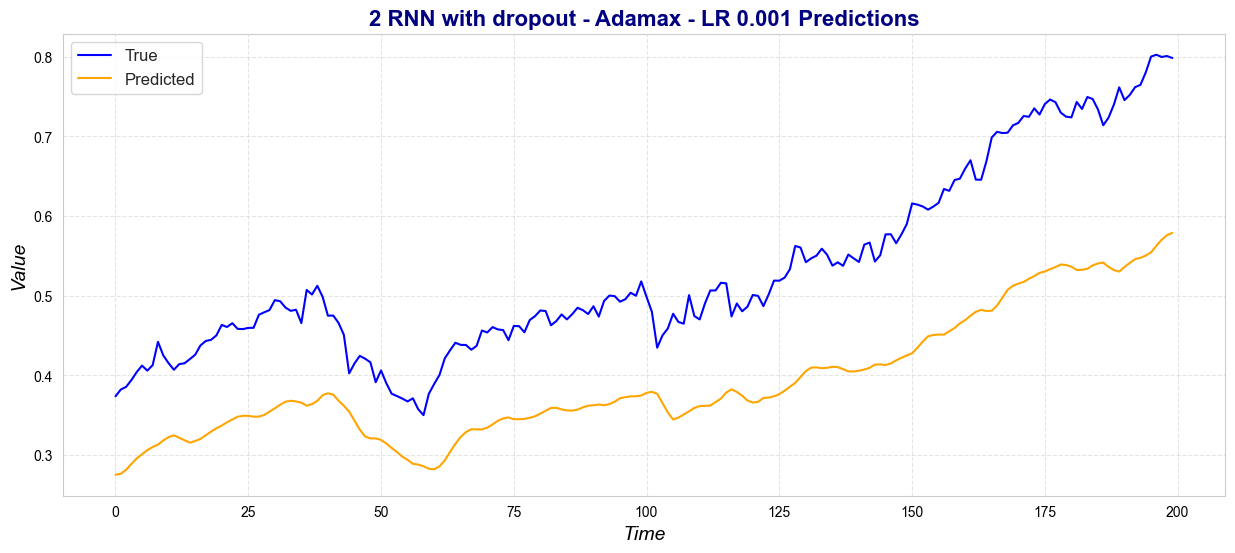

Model      RMSE       MAE        R2  \
17  2 RNN with dropout - Adamax - LR 0.001  0.144156  0.137891 -0.513847   

         MSE       MAPE  MSLE  
17  0.020781  27.468294     0

In [80]:
plot_train_history(history_rnn_adamax_lr_001)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_adamax_lr_001, '2 RNN with dropout - Adamax - LR 0.001',
           X_test, y_test, 200)

In [81]:
model_rnn_2_adamax_lr_015 = Sequential()
model_rnn_2_adamax_lr_015.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_adamax_lr_015.add(Dropout(0.2))
model_rnn_2_adamax_lr_015.add(SimpleRNN(100, activation="relu"))
model_rnn_2_adamax_lr_015.add(Dropout(0.2))
model_rnn_2_adamax_lr_015.add(Dense(1))


model_rnn_2_adamax_lr_015.compile(loss='mean_squared_error', optimizer=optimizers.Adamax(learning_rate=0.015))
model_rnn_2_adamax_lr_015.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_22 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_23 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history_rnn_adamax_lr_015 = model_rnn_2_adamax_lr_015.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 1.2881 - val_loss: 0.0039
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - val_loss: 6.1367e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - val_loss: 8.3183e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - val_loss: 7.5779e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 0.0015


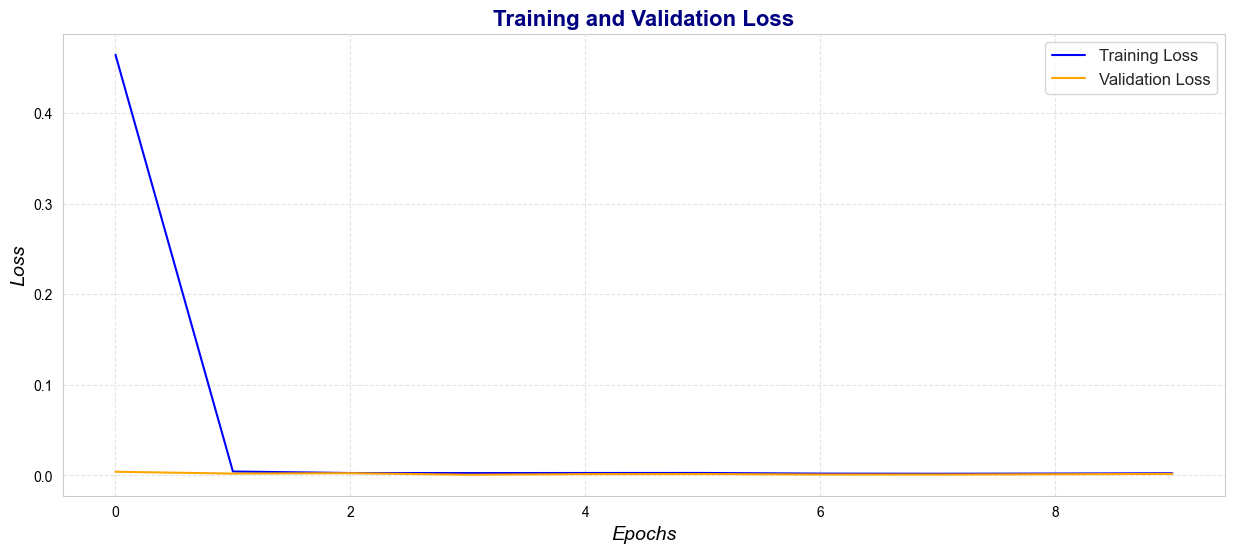

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


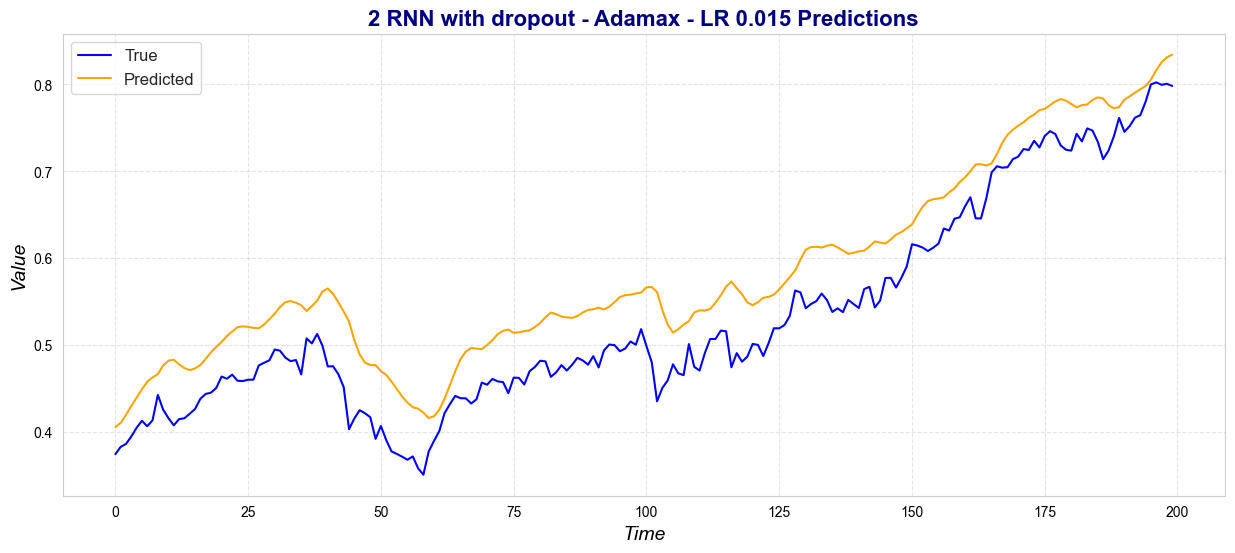

Model     RMSE       MAE        R2  \
18  2 RNN with dropout - Adamax - LR 0.015  0.05448  0.051139  0.783784   

         MSE       MAPE  MSLE  
18  0.002968  26.576571     0

In [83]:
plot_train_history(history_rnn_adamax_lr_015)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_adamax_lr_015, '2 RNN with dropout - Adamax - LR 0.015',
           X_test, y_test, 200)

In [109]:
model_rnn_2_adamax_lr_015 = Sequential()
model_rnn_2_adamax_lr_015.add(SimpleRNN(100, activation="relu", return_sequences=True, input_shape=(X_train.shape[1],1)))
model_rnn_2_adamax_lr_015.add(Dropout(0.2))
model_rnn_2_adamax_lr_015.add(SimpleRNN(100, activation="relu"))
model_rnn_2_adamax_lr_015.add(Dropout(0.2))
model_rnn_2_adamax_lr_015.add(Dense(1))


model_rnn_2_adamax_lr_015.compile(loss='mean_squared_error', optimizer=optimizers.Adamax(learning_rate=0.015))
model_rnn_2_adamax_lr_015.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_32 (SimpleRNN)       │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_33 (SimpleRNN)       │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history_rnn_adamax_lr_015 = model_rnn_2_adamax_lr_015.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/50


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3556e-04 - val_loss: 5.3756e-04
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.1116e-04 - val_loss: 3.9160e-04
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8490e-04 - val_loss: 0.0011
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.5495e-04 - val_loss: 4.4125e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0097e-04 - val_loss: 5.6876e-04
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0863e-04 - val_loss: 6.4555e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6433e-04 - val_loss: 9.1738e-04
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1645e-04 - val_loss: 5.8230e-04
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.1742e-04 - val_loss: 4.0306e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4344e-04 - val_loss: 3.8532e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2134e-04 - val_loss: 5.6952e

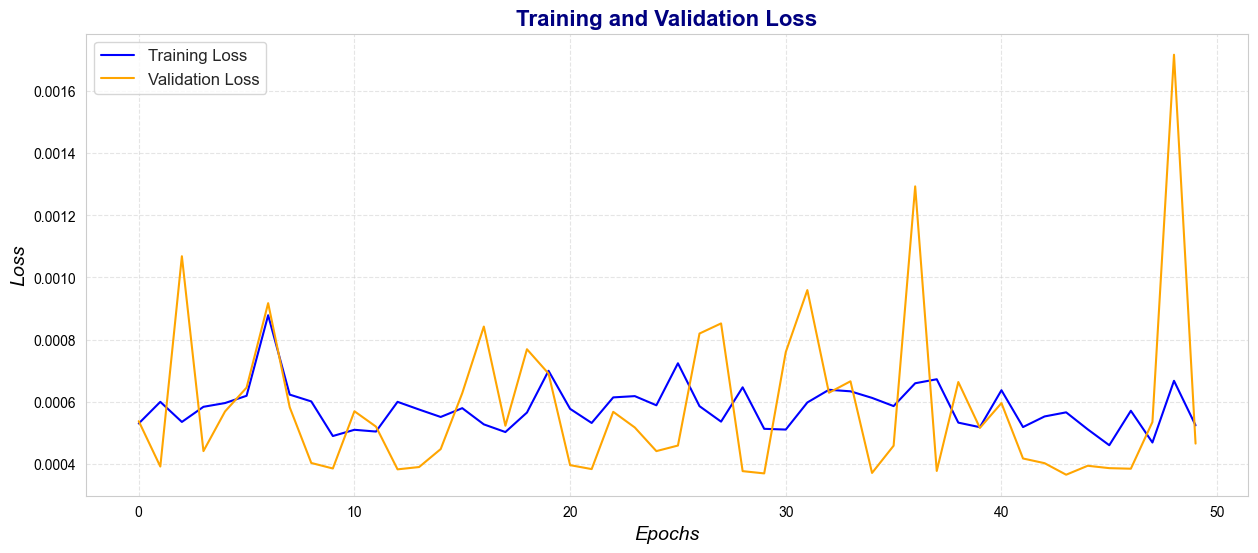

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


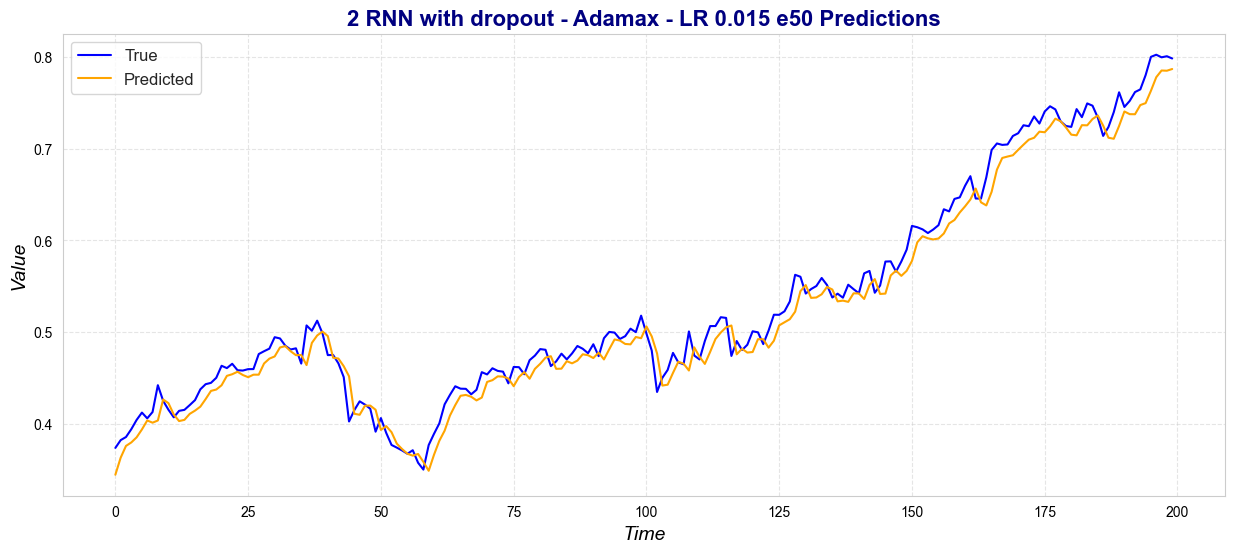

Model      RMSE       MAE        R2  \
23  2 RNN with dropout - Adamax - LR 0.015 e50  0.017613  0.014441  0.977402   

        MSE       MAPE  MSLE  
23  0.00031  23.494915     0

In [113]:
plot_train_history(history_rnn_adamax_lr_015)
best_model = load_model('best_model.keras')
test_model(model_rnn_2_adamax_lr_015, '2 RNN with dropout - Adamax - LR 0.015 e50',
           X_test, y_test, 200)

In [114]:
all_results.sort_values(by="MSE")

Model      RMSE       MAE         R2  \
0                                   Simple RNN  0.013022  0.009576   0.896533   
23  2 RNN with dropout - Adamax - LR 0.015 e50  0.017613  0.014441   0.977402   
1                           2 RNN with dropout  0.019103  0.016403   0.777336   
21       2 RNN with dropout - Adam - LR 0.0001  0.022598  0.018926   0.962800   
10                                  Conv + GRU  0.028331  0.022733   0.941530   
8                                  Conv + LSTM  0.029150  0.023693   0.938102   
11                 2 RNN with dropout - Adamax  0.034136  0.028494   0.915115   
6                              2 LSTM with GRU  0.034417  0.028217   0.913711   
16                2 RNN with dropout - RMSprop  0.037040  0.026741   0.900055   
4                          2 LSTM with dropout  0.041542  0.036164   0.874285   
3                                  Simple LSTM  0.042239  0.038315   0.870033   
14                  2 RNN with dropout - Nadam  0.043624  0.038864   0.861369   
9                                   Conv + RNN  0.048635  0.036163   0.827688   
18      2 RNN with dropout - Adamax - LR 0.015  0.054480  0.051139   0.783784   
2                           3 RNN with dropout  0.057471  0.055181  -1.015223   
19        2 RNN with dropout - Adam - LR 0.001  0.064085  0.058239   0.700828   
20        2 RNN with dropout - Adam - LR 0.015  0.064085  0.058239   0.700828   
5                   Multiple LSTM with dropout  0.064270  0.051498   0.699097   
22        2 RNN with dropout - Adam - LR 0.015  0.073181  0.062358   0.609871   
13                2 RNN with dropout - Adagrad  0.098634  0.086397   0.291296   
12                    2 RNN with dropout - SGD  0.126684  0.117707  -0.169123   
17      2 RNN with dropout - Adamax - LR 0.001  0.144156  0.137891  -0.513847   
7                                        2 GRU  0.159888  0.142659  -0.862282   
15               2 RNN with dropout - Adadelta  0.702681  0.685944 -34.969249   

         MSE        MAPE  MSLE  
0   0.000170   10.681614     0  
23  0.000310   23.494915     0  
1   0.000365   10.354017     0  
21  0.000511   23.032037     0  
10  0.000803   22.684258     0  
8   0.000850   23.178724     0  
11  0.001165   23.940441     0  
6   0.001185   22.038050     0  
16  0.001372   20.875545     0  
4   0.001726   22.090024     0  
3   0.001784   23.264943     0  
14  0.001903   22.487646     0  
9   0.002365   20.349620     0  
18  0.002968   26.576571     0  
2   0.003303   14.023619     0  
19  0.004107   22.193025     0  
20  0.004107   22.193025     0  
5   0.004131   20.181740     0  
22  0.005355   21.262161     0  
13  0.009729   21.436583     0  
12  0.016049   24.686181     0  
17  0.020781   27.468294     0  
7   0.025564   25.402431     0  
15  0.493761  130.599774     0